In [ ]:
%shell sudo apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”


In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(googledrive)
drive_auth()

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=742c90ef7ca7dee7dc3d8305b5baacaa&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVVKUi14NkZXMWFhRTU1NFN2NzdmSUVyakVYdGxlVHZMVmplV0NiUl9CblJxQzFBN0ltZEk2aGlSZ0RPY3gyVkJKQkp3USIsInN0YXRlIjoiNzQyYzkwZWY3Y2E3ZGVlN2RjM2Q4MzA1YjViYWFjYWEifQ==


In [3]:
drive_download(file = "Demografia/Doutorado/Tese/R/dados_combinados.rds", path = "dados_combinados.rds", overwrite = TRUE)

# Agora, carregue os dados normalmente:
dados_combinados <- readRDS("dados_combinados.rds")

File downloaded:

• dados_combinados.rds <id: 1IB-jPFyW4o2Q516MZT81QzmklOCIH3IL>

Saved locally as:

• dados_combinados.rds



In [4]:
dados_combinados<- dados_combinados %>%
  filter(NU_ANO == "2022")

In [5]:
dados_combinados$IDADE <- ifelse(substr(dados_combinados$NU_IDADE_N, 1, 1) == "4",
                                    as.numeric(substr(dados_combinados$NU_IDADE_N, 3, 4)),
                                    ifelse(substr(dados_combinados$NU_IDADE_N, 1, 1) %in% c("1", "2", "3"), 0, NA))

In [6]:
dados_combinados$faixas_etarias <- cut(dados_combinados$IDADE,
                                          breaks = c(-1, 0, 4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 89, 94, 99, Inf),
                                          labels = c("Menor de 1", "1 a 4", "5 a 9", "10 a 14", "15 a 19", "20 a 24", "25 a 29",
                                                     "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54", "55 a 59", "60 a 64",
                                                     "65 a 69", "70 a 74", "75 a 79", "80 a 84", "85 a 89", "90 a 94", "95 a 99", "100+"))

In [ ]:
names(dados_combinados)

[1] "TP_NOT"         "ID_AGRAVO"      "DT_NOTIFIC"     "SEM_NOT"       
  [5] "NU_ANO"         "SG_UF_NOT"      "ID_MUNICIP"     "ID_UNIDADE"    
  [9] "DT_OCOR"        "SEM_PRI"        "ANO_NASC"       "NU_IDADE_N"    
 [13] "CS_SEXO"        "CS_GESTANT"     "CS_RACA"        "CS_ESCOL_N"    
 [17] "SG_UF"          "ID_MN_RESI"     "ID_PAIS"        "NDUPLIC"       
 [21] "DT_INVEST"      "ID_OCUPA_N"     "SIT_CONJUG"     "DEF_TRANS"     
 [25] "DEF_FISICA"     "DEF_MENTAL"     "DEF_VISUAL"     "DEF_AUDITI"    
 [29] "TRAN_MENT"      "TRAN_COMP"      "DEF_OUT"        "DEF_ESPEC"     
 [33] "SG_UF_OCOR"     "ID_MN_OCOR"     "HORA_OCOR"      "LOCAL_OCOR"    
 [37] "LOCAL_ESPE"     "OUT_VEZES"      "LES_AUTOP"      "VIOL_FISIC"    
 [41] "VIOL_PSICO"     "VIOL_TORT"      "VIOL_SEXU"      "VIOL_TRAF"     
 [45] "VIOL_FINAN"     "VIOL_NEGLI"     "VIOL_INFAN"     "VIOL_LEGAL"    
 [49] "VIOL_OUTR"      "VIOL_ESPEC"     "AG_FORCA"       "AG_ENFOR"      
 [53] "AG_OBJETO"      "AG_CORTE"       "AG_QUENTE"      "AG_ENVEN"      
 [57] "AG_FOGO"        "AG_AMEACA"      "AG_OUTROS"      "AG_ESPEC"      
 [61] "SEX_ASSEDI"     "SEX_ESTUPR"     "SEX_PUDOR"      "SEX_PORNO"     
 [65] "SEX_EXPLO"      "SEX_OUTRO"      "SEX_ESPEC"      "PEN_ORAL"      
 [69] "PEN_ANAL"       "PEN_VAGINA"     "PROC_DST"       "PROC_HIV"      
 [73] "PROC_HEPB"      "PROC_SANG"      "PROC_SEMEN"     "PROC_VAGIN"    
 [77] "PROC_CONTR"     "PROC_ABORT"     "CONS_ABORT"     "CONS_GRAV"     
 [81] "CONS_DST"       "CONS_SUIC"      "CONS_MENT"      "CONS_COMP"     
 [85] "CONS_ESTRE"     "CONS_OUTR"      "CONS_ESPEC"     "LESAO_NAT"     
 [89] "LESAO_ESPE"     "LESAO_CORP"     "NUM_ENVOLV"     "REL_SEXUAL"    
 [93] "REL_PAI"        "REL_MAE"        "REL_PAD"        "REL_CONJ"      
 [97] "REL_EXCON"      "REL_NAMO"       "REL_EXNAM"      "REL_FILHO"     
[101] "REL_DESCO"      "REL_IRMAO"      "REL_CONHEC"     "REL_CUIDA"     
[105] "REL_PATRAO"     "REL_INST"       "REL_POL"        "REL_PROPRI"    
[109] "REL_OUTROS"     "REL_ESPEC"      "AUTOR_SEXO"     "AUTOR_ALCO"    
[113] "ENC_SAUDE"      "ENC_TUTELA"     "ENC_VARA"       "ENC_ABRIGO"    
[117] "ENC_SENTIN"     "ENC_DEAM"       "ENC_DPCA"       "ENC_DELEG"     
[121] "ENC_MPU"        "ENC_MULHER"     "ENC_CREAS"      "ENC_IML"       
[125] "ENC_OUTR"       "ENC_ESPEC"      "REL_TRAB"       "REL_CAT"       
[129] "CIRC_LESAO"     "CLASSI_FIN"     "EVOLUCAO"       "DT_OBITO"      
[133] "DT_DIGITA"      "DT_TRANSUS"     "DT_TRANSDM"     "DT_TRANSSM"    
[137] "DT_TRANSRM"     "DT_TRANSRS"     "DT_TRANSSE"     "REL_MAD"       
[141] "TPUNINOT"       "ORIENT_SEX"     "IDENT_GEN"      "VIOL_MOTIV"    
[145] "CICL_VID"       "REDE_SAU"       "ASSIST_SOC"     "REDE_EDUCA"    
[149] "ATEND_MULH"     "CONS_TUTEL"     "CONS_IDO"       "DELEG_IDOS"    
[153] "DIR_HUMAN"      "MPU"            "DELEG_CRIA"     "DELEG_MULH"    
[157] "DELEG"          "INFAN_JUV"      "DEFEN_PUBL"     "DT_ENCERRA"    
[161] "IDADE"          "faixas_etarias"

In [7]:
# Criar variável 'gestante' baseada em CS_GESTANT
dados_combinados <- dados_combinados %>%
  mutate(
    gestante = case_when(
      CS_GESTANT %in% c(1, 2, 3, 4) ~ "Sim",
      CS_GESTANT == 5                ~ "Não",
      CS_GESTANT == 6                ~ "Não se aplica",  # Geralmente para homens ou crianças ou idosas
      CS_GESTANT == 9                ~ "Ignorado",
      TRUE                           ~ NA_character_     # Para códigos não previstos
    )
  )

In [8]:
dados <- dados_combinados

In [9]:
agrega_rel <- function(x) {
  # Remove NAs para verificar se todos os valores são NA
  x_sem_na <- na.omit(x)

  # Se todos os valores forem NA, retorna "Ausente"
  if (length(x_sem_na) == 0) {
    return("Ausente")
  }

  # Se pelo menos um valor for 1, retorna 1
  if (any(x_sem_na == 1)) {
    return(1)
  }

  # Se todos os valores forem 2, retorna 2
  if (all(x_sem_na == 2)) {
    return(2)
  }

  # Se todos os valores forem 9, retorna 9
  if (all(x_sem_na == 9)) {
    return(9)
  }

  # Caso contrário, retorna "Ignorado" (se não se encaixar em nenhum dos casos acima)
  return("Ignorado")
}

In [10]:
dados$Familiar <- apply(dados[, c("REL_PAI", "REL_MAE", "REL_PAD", "REL_MAD", "REL_FILHO", "REL_IRMAO")],
                        1, agrega_rel)
dados$ParceiroIntimo <- apply(dados[, c("REL_CONJ", "REL_EXCON", "REL_NAMO", "REL_EXNAM")],
                              1, agrega_rel)
dados$Conhecido <- apply(dados[, c("REL_CONHEC", "REL_CUIDA", "REL_PATRAO", "REL_INST")],
                         1, agrega_rel)

In [11]:
# Lista de variáveis
variaveis <- c(
  "VIOL_SEXU", "CS_SEXO", "CS_RACA", "CS_ESCOL_N", "LOCAL_OCOR",
  "NUM_ENVOLV", "SIT_CONJUG", "DEF_TRANS", "gestante", "OUT_VEZES",
  "AUTOR_ALCO", "AUTOR_SEXO", "CICL_VID", "REL_POL", "REL_DESCO",
  "Familiar", "ParceiroIntimo", "Conhecido", "faixas_etarias",
  "NU_ANO", "SG_UF_NOT", "NU_IDADE_N", "CS_GESTANT",
  "REL_PAI", "REL_MAE", "REL_PAD", "REL_MAD", "REL_CONJ",
  "REL_EXCON", "REL_NAMO", "REL_EXNAM", "REL_FILHO", "REL_IRMAO",
  "REL_CONHEC", "REL_CUIDA", "REL_PATRAO", "REL_INST",
  "SEX_ASSEDI", "SEX_ESTUPR", "SEX_PUDOR", "SEX_PORNO", "SEX_EXPLO",
  "SEX_OUTRO", "PROC_DST", "PROC_HIV", "PROC_HEPB", "PROC_SANG",
  "PROC_SEMEN", "PROC_VAGIN", "PROC_CONTR", "PROC_ABORT"
)


# 3. Calcular % de missing por variável
resultado_perc <- dados %>%
  summarise(across(
    all_of(variaveis),
    ~ round(mean(is.na(.)) * 100, 2)  # % de missing com 2 decimais
  )) %>%
  t() %>%  # Transpor para formato vertical
  as.data.frame() %>%
  rename("% Missing" = V1) %>%
  tibble::rownames_to_column("Variável") %>%
  # Ordenar do maior para menor % de missing (opcional)
  arrange(desc(`% Missing`))

# 4. Visualizar resultado
print(resultado_perc)

         Variável % Missing
1       SEX_PUDOR     99.81
2      PROC_VAGIN      8.05
3      PROC_CONTR      8.05
4      PROC_ABORT      8.01
5      NUM_ENVOLV      5.40
6      SIT_CONJUG      5.27
7         REL_POL      5.17
8         REL_MAD      5.17
9       REL_CUIDA      5.17
10     REL_PATRAO      5.17
11       REL_INST      5.17
12        REL_PAD      5.16
13       REL_NAMO      5.16
14      REL_EXNAM      5.16
15      REL_FILHO      5.16
16      REL_IRMAO      5.16
17      REL_DESCO      5.14
18     REL_CONHEC      5.13
19      REL_EXCON      5.11
20     PROC_SEMEN      5.09
21       REL_CONJ      5.08
22      SEX_OUTRO      5.07
23      PROC_HEPB      5.06
24       PROC_DST      5.05
25       PROC_HIV      5.05
26      PROC_SANG      5.03
27        REL_PAI      4.95
28      SEX_EXPLO      4.92
29      SEX_PORNO      4.91
30     AUTOR_ALCO      4.89
31     SEX_ASSEDI      4.81
32      OUT_VEZES      4.79
33        REL_MAE      4.77
34     SEX_ESTUPR      4.72
35     CS_ESCOL_N   

In [ ]:
nrow(dados)

[1] 509150

In [ ]:
100*sum(dados$Familiar == "Ausente", na.rm = TRUE)/509150
100*sum(dados$ParceiroIntimo == "Ausente", na.rm = TRUE)/509150
100*sum(dados$Conhecido == "Ausente", na.rm = TRUE)/509150

[1] 4.67485

[1] 4.982029

[1] 5.125601

In [ ]:
sum(is.na(dados$VIOL_SEXU))

[1] 23094

In [ ]:
vs <- subset(dados, VIOL_SEXU == 1)
nrow(vs)

[1] 61393

In [ ]:
table(dados$VIOL_SEXU)


     1      2      9 
 61393 414448  10215 

In [ ]:
nrow(dados)

[1] 509150

In [ ]:
# Filtrar o banco para VIOL_SEXU == 1
dados_filtrados <- subset(dados, VIOL_SEXU == 1)

In [ ]:
# Tabela para sexo
tabela_sexo <- table(dados_filtrados$CS_SEXO)
print(tabela_sexo)



    F     I     M 
54969    26  6398 


In [ ]:
# Tabela para CS_RACA
tabela_raca <- table(dados_filtrados$CS_RACA)
print(tabela_raca)


    1     2     3     4     5     9 
21590  5993   541 29173   785  3087 


In [ ]:
# Tabela para CS_ESCOL_N
tabela_escol <- table(dados_filtrados$CS_ESCOL_N)
print(tabela_escol)



   00    01    02    03    04    05    06    07    08    09    10     9 
  359  4873  2110 13838  2852  5041  5310  1887  1515  9748 11913     0 


In [ ]:
# Tabela para gestante
tabela_gestante <- table(dados_filtrados$gestante)
print(tabela_gestante)



     Ignorado           Não Não se aplica           Sim 
         4747         23288         26739          6618 


In [ ]:
# Tabela para situação conjugal
tabela_sitconj <- table(dados_filtrados$SIT_CONJUG)
print(tabela_sitconj)


    1     2     3     4     8     9 
28819  4589   292  1472 21702  3836 


In [ ]:
# Tabela para local de ocorrência
tabela_local <- table(dados_filtrados$LOCAL_OCOR)
print(tabela_local)


   01    02    03    04    05    06    07    08    09    99     2     1 
39864   489  1907   191   971  5335   765   110  5882  5850     0     0 


In [ ]:
# Tabela para sexo do autor
tabela_autorsexo <- table(dados_filtrados$AUTOR_SEXO)
print(tabela_autorsexo)


    1     2     3     9     4     5 
54908  1704  1118  3640     0     0 


In [ ]:
# Tabela para uso de alcool
tabela_autoralcool <- table(dados_filtrados$AUTOR_ALCO)
print(tabela_autoralcool)


    1     2     9 
13024 26698 21249 


In [ ]:
# Tabela para numero de envolvidos
tabela_num<- table(dados_filtrados$NUM_ENVOLV)
print(tabela_num)


    1     2     9     3 
49055  7945  3939     0 


In [ ]:
# Tabela para def trans
tabela_def<- table(dados_filtrados$DEF_TRANS)
print(tabela_def)


    1     2     8     9 
 5437 48271   117  7129 


In [ ]:
# Tabela para reincidencia
tabela_out<- table(dados_filtrados$OUT_VEZES)
print(tabela_out)


    1     2     9     0 
25239 23813 11698     1 


In [ ]:
# Tabela para ciclp de vida do autor
tabela_ciclo<- table(dados_filtrados$CICL_VID)
print(tabela_ciclo)


    1     2     3     4     5     9 
 1461  8645  7083 28049  2381 13652 


In [ ]:
# Tabela para familiar
tabela_familiar<- table(dados_filtrados$Familiar)
print(tabela_familiar)


       1        2        9  Ausente Ignorado 
   13667    44324     2622      294      486 


In [ ]:
# Tabela para Parceiro
tabela_parceiro<- table(dados_filtrados$ParceiroIntimo)
print(tabela_parceiro)


       1        2        9  Ausente Ignorado 
    8840    49285     2764      377      127 


In [ ]:
# Tabela para conhecido
tabela_conhecido<- table(dados_filtrados$Conhecido)
print(tabela_conhecido)


       1        2        9  Ausente Ignorado 
   15851    42115     2650      330      447 


In [ ]:
# Tabela para desconhecido
tabela_desconhecido<- table(dados_filtrados$REL_DESCO)
print(tabela_desconhecido)


    1     2     9 
10981 47030  3036 


In [ ]:
# Tabela para olicial
tabela_policial<- table(dados_filtrados$REL_POL)
print(tabela_policial)


    1     2     9 
   94 57916  2966 


In [ ]:
# Vetor com todas as colunas de tipo de violência
tipos <- c("SEX_ASSEDI","SEX_ESTUPR",
           "SEX_PORNO","SEX_EXPLO","SEX_OUTRO")

# Subconjunto apenas com violência sexual confirmada
df_vs <- subset(dados, VIOL_SEXU == 1)

freq_tipo <- sapply(tipos, function(col) sum(df_vs [[col]] == 1, na.rm = TRUE))


prop_tipo <- round(100 * freq_tipo / sum(freq_tipo), 1)

tabela_tipos <- data.frame(
  Tipo = names(freq_tipo),
  Frequência = as.integer(freq_tipo),
  Percentual = paste0(prop_tipo, "%")
)
print(tabela_tipos)


        Tipo Frequência Percentual
1 SEX_ASSEDI      18325      26.7%
2 SEX_ESTUPR      43857        64%
3  SEX_PORNO       1041       1.5%
4  SEX_EXPLO       1348         2%
5  SEX_OUTRO       3969       5.8%


In [ ]:
library (ggplot2)

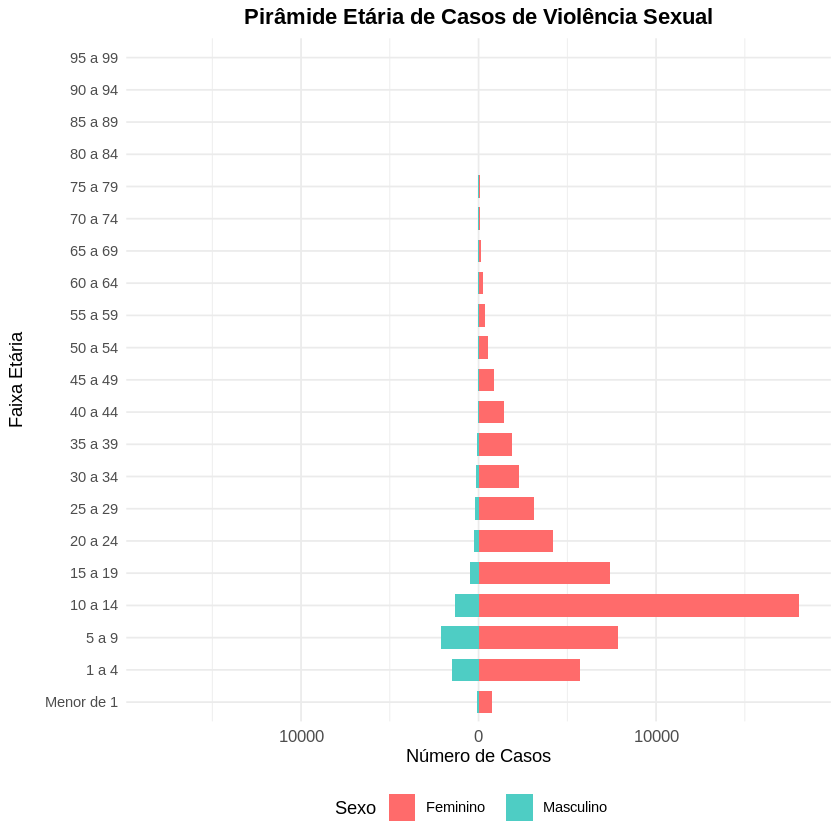

In [ ]:
# Passo 1: Filtrar apenas F e M e agrupar por faixa etária e sexo
dados_piramide <- dados %>%
  filter(
    VIOL_SEXU == 1,          # Filtrar apenas violência sexual
    CS_SEXO %in% c("F", "M") # Filtrar sexo feminino e masculino
  ) %>%
  group_by(faixas_etarias, CS_SEXO) %>%
  summarise(Contagem = n(), .groups = "drop")

# Passo 2: Criar a pirâmide etária
ggplot(dados_piramide, aes(
    x = faixas_etarias,
    y = ifelse(CS_SEXO == "M", -Contagem, Contagem),  # M no negativo, F no positivo
    fill = CS_SEXO
  )) +
  geom_bar(stat = "identity", width = 0.7) +
  coord_flip() +  # Inverte eixos para formato de pirâmide
  scale_y_continuous(
    labels = function(x) abs(x),  # Remove o sinal negativo dos valores de M
    limits = max(abs(dados_piramide$Contagem)) * c(-1, 1)  # Ajusta os limites
  ) +
  labs(
    title = "Pirâmide Etária de Casos de Violência Sexual",
    x = "Faixa Etária",
    y = "Número de Casos",
    fill = "Sexo"
  ) +
  scale_fill_manual(
    values = c("F" = "#FF6B6B", "M" = "#4ECDC4"),  # Cores personalizadas
    labels = c("F" = "Feminino", "M" = "Masculino")
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold"),
    axis.text.x = element_text(size = 10),
    legend.position = "bottom"
  )

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.0.4     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
# Tabela de contagem tipo de exame (valor = 1)
tabela_contagem <- dados %>%
  summarise(
    PROC_DST = 100*sum(PROC_DST == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_HIV = 100*sum(PROC_HIV == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_HEPB = 100*sum(PROC_HEPB == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_SANG = 100*sum(PROC_SANG == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_SEMEN = 100*sum(PROC_SEMEN == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_VAGIN = 100*sum(PROC_VAGIN == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_CONTR = 100*sum(PROC_CONTR == 1, na.rm = TRUE)/(nrow(dados_filtrados)),
    PROC_ABORT = 100*sum(PROC_ABORT == 1, na.rm = TRUE)/(nrow(dados_filtrados))
  ) %>%
  pivot_longer(
    cols = everything(),
    names_to = "Procedimento",
    values_to = "Contagem"
  )

# Mostrar a tabela
print(tabela_contagem)

# A tibble: 8 × 2
  Procedimento Contagem
  <chr>           <dbl>
1 PROC_DST        18.2 
2 PROC_HIV        16.5 
3 PROC_HEPB       10.5 
4 PROC_SANG       26.3 
5 PROC_SEMEN       2.05
6 PROC_VAGIN       5.61
7 PROC_CONTR       8.96
8 PROC_ABORT       2.15


In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(pheatmap)

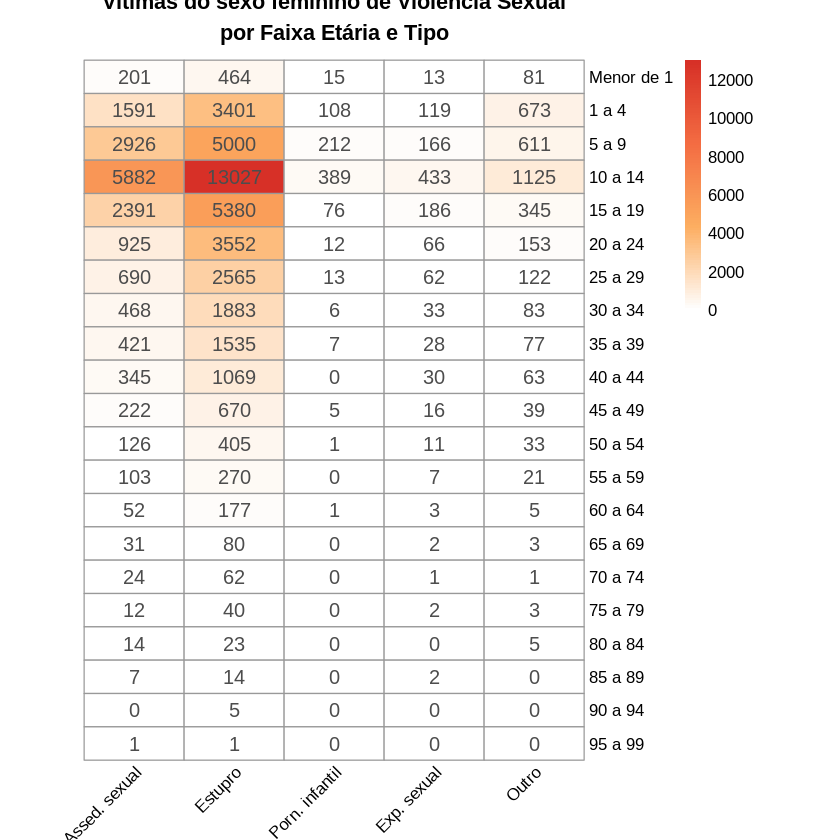

In [ ]:
# Função para gerar heatmap por sexo
gerar_heatmap_por_sexo <- function(sexo_codigo, sexo_label) {
  df_filtrado <- dados %>%
    filter(VIOL_SEXU == 1,
           CS_SEXO == sexo_codigo,
           !is.na(faixas_etarias)) %>%
    mutate(faixas_etarias = factor(faixas_etarias, levels = ordem_faixas)) %>%
    select(faixas_etarias, all_of(names(rotulos_tipos))) %>%
    pivot_longer(-faixas_etarias, names_to = "tipo_violencia", values_to = "ocorreu") %>%
    filter(ocorreu == 1) %>%
    count(faixas_etarias, tipo_violencia) %>%
    pivot_wider(names_from = tipo_violencia, values_from = n, values_fill = 0)

  mat <- df_filtrado %>%
    column_to_rownames(var = "faixas_etarias") %>%
    as.matrix()

  colnames(mat) <- rotulos_tipos[colnames(mat)]
  colunas_existentes <- intersect(ordem_colunas, colnames(mat))
  mat <- mat[, colunas_existentes]

  # Escala e cores específicas para cada heatmap
  cores <- colorRampPalette(c("white", "#fdae61", "#f46d43", "#d73027"))(100)
  breaks <- seq(min(mat, na.rm = TRUE), max(mat, na.rm = TRUE), length.out = 101)

  pheatmap(
    mat,
    cluster_rows    = FALSE,
    cluster_cols    = FALSE,
    display_numbers = TRUE,
    number_format   = "%.0f",
    fontsize_number = 12,
    color           = cores,
    breaks          = breaks,
    cellwidth       = 60,
    cellheight      = 20,
    main            = paste("Vítimas", sexo_label, "de Violência Sexual\npor Faixa Etária e Tipo"),
    angle_col       = 45
  )
}

# Dicionário de rótulos para tipos de violência
rotulos_tipos <- c(
  "SEX_ASSEDI" = "Assed. sexual",
  "SEX_ESTUPR" = "Estupro",
  "SEX_PORNO"  = "Porn. infantil",
  "SEX_EXPLO"  = "Exp. sexual",
  "SEX_OUTRO"  = "Outro"
)

# Ordem das faixas etárias e colunas
ordem_faixas <- c(
  "Menor de 1", "1 a 4", "5 a 9", "10 a 14", "15 a 19",
  "20 a 24", "25 a 29", "30 a 34", "35 a 39", "40 a 44",
  "45 a 49", "50 a 54", "55 a 59", "60 a 64", "65 a 69",
  "70 a 74", "75 a 79", "80 a 84", "85 a 89", "90 a 94",
  "95 a 99", "100+"
)

ordem_colunas <- c(
  "Assed. sexual",
  "Estupro",
  "Porn. infantil",
  "Exp. sexual",
  "Outro"
)

# Gerar heatmap para sexo feminino (F)
gerar_heatmap_por_sexo(sexo_codigo = "F", sexo_label = "do sexo feminino")



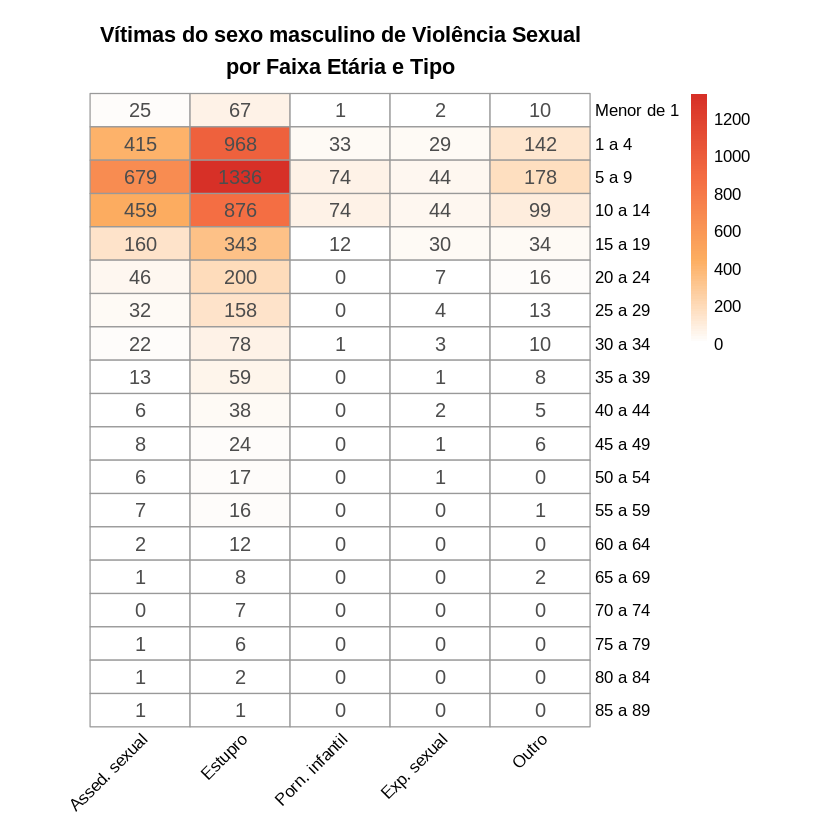

In [ ]:

# Gerar heatmap para sexo masculino (M)
gerar_heatmap_por_sexo(sexo_codigo = "M", sexo_label = "do sexo masculino")

In [13]:
install.packages("bnlearn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(bnlearn)

In [15]:
#Rede 1: Fatores Associados à Ocorrência de Violência Sexual
dadosrede1 <- dados %>%
  select(VIOL_SEXU, CS_SEXO, CS_RACA, CS_ESCOL_N, LOCAL_OCOR, NUM_ENVOLV, SIT_CONJUG, DEF_TRANS, gestante,
         OUT_VEZES, AUTOR_ALCO, AUTOR_SEXO, CICL_VID,
         REL_POL, REL_DESCO, Familiar, ParceiroIntimo, Conhecido, faixas_etarias)

In [16]:
dadosrede1 <- dadosrede1 %>% mutate(across(everything(), as.factor))

In [17]:
# 1. Manter apenas F e M no sexo
dadosrede1 <- dadosrede1 %>% filter(CS_SEXO %in% c("F", "M"))

# 2. Remover resposta "3" de NUM_ENVOLV (se for inválida ou vazia)
dadosrede1 <- dadosrede1 %>% filter(NUM_ENVOLV != "3")

# 3. Remover NA's de gestante
dadosrede1 <- dadosrede1 %>% filter(!is.na(gestante))

# 4. Remover gestante "Sim" de pessoas do sexo masculino (por coerência)
dadosrede1 <- dadosrede1 %>% filter(!(gestante == "Sim" & CS_SEXO != "F"))

# 5. Remover categorias 4 e 5 de AUTOR_SEXO (caso não existam ou tenham frequência nula)
dadosrede1 <- dadosrede1 %>% filter(!(AUTOR_SEXO %in% c("4", "5")))

In [18]:
dadosrede1 <- droplevels(dadosrede1)


In [19]:
summary(dadosrede1)
sapply(dadosrede1, function(x) length(unique(x)))


 VIOL_SEXU     CS_SEXO    CS_RACA         CS_ESCOL_N       LOCAL_OCOR    
 1   : 60914   F:339048   1   :180480   09     :138637   01     :327638  
 2   :406335   M:142465   2   : 41525   06     : 74292   06     : 53098  
 9   :  9683              3   :  4485   03     : 58609   99     : 43408  
 NA's:  4581              4   :216738   10     : 48966   09     : 26260  
                          5   :  4515   05     : 45878   03     :  9685  
                          9   : 32456   (Other): 94421   (Other): 21115  
                          NA's:  1314   NA's   : 20710   NA's   :   309  
 NUM_ENVOLV SIT_CONJUG    DEF_TRANS              gestante      OUT_VEZES    
 1:370233   1   :196982   1   : 69121   Ignorado     : 46636   1   :189778  
 2: 82778   2   : 99606   2   :322000   Não          :200229   2   :175997  
 9: 28502   3   :  7467   8   :   463   Não se aplica:217614   9   :111211  
            4   : 21297   9   : 86208   Sim          : 17034   0   :     2  
            8   : 77384

VIOL_SEXU        CS_SEXO        CS_RACA     CS_ESCOL_N     LOCAL_OCOR 
             4              2              7             12             11 
    NUM_ENVOLV     SIT_CONJUG      DEF_TRANS       gestante      OUT_VEZES 
             3              7              5              4              5 
    AUTOR_ALCO     AUTOR_SEXO       CICL_VID        REL_POL      REL_DESCO 
             4              5              7              4              4 
      Familiar ParceiroIntimo      Conhecido faixas_etarias 
             5              5              5             21

In [20]:
set.seed(123)
# 1) Rede completa a partir de dadosrede1
rede_full <- structural.em(
  dadosrede1,
  maximize      = "hc",
  maximize.args = list(score = "bic"),
  fit           = "mle",
  impute        = "bayes-lw",

)



In [21]:
# 2) Extrair o Markov Blanket de VIOL_SEXU
mb_viol <- mb(rede_full, node = "VIOL_SEXU")

# 3) Criar subconjunto com variáveis do Blanket + alvo
dados_mb <- dadosrede1[, c(mb_viol, "VIOL_SEXU")]
set.seed(123)
# 4) Structural EM restrito ao Blanket (opcional)
rede_mb_sem <- structural.em(
  dados_mb,
  maximize      = "hc",
  maximize.args = list(score = "bic"),
  fit           = "mle",
  impute        = "bayes-lw",

)

In [ ]:
print(rede_full)


  Bayesian network learned from Missing Data

  model:
   [NUM_ENVOLV][AUTOR_SEXO|NUM_ENVOLV][CS_SEXO|NUM_ENVOLV:AUTOR_SEXO]
   [SIT_CONJUG|CS_SEXO:NUM_ENVOLV:AUTOR_SEXO]
   [faixas_etarias|CS_SEXO:SIT_CONJUG:AUTOR_SEXO]
   [VIOL_SEXU|CS_SEXO:AUTOR_SEXO:faixas_etarias]
   [CS_ESCOL_N|SIT_CONJUG:faixas_etarias]
   [Familiar|VIOL_SEXU:AUTOR_SEXO:faixas_etarias]
   [CICL_VID|AUTOR_SEXO:Familiar:faixas_etarias]
   [ParceiroIntimo|VIOL_SEXU:CS_SEXO:AUTOR_SEXO:Familiar]
   [DEF_TRANS|CS_SEXO:SIT_CONJUG:AUTOR_SEXO:ParceiroIntimo]
   [Conhecido|NUM_ENVOLV:AUTOR_SEXO:Familiar:ParceiroIntimo]
   [CS_RACA|CS_ESCOL_N:DEF_TRANS][gestante|CS_SEXO:DEF_TRANS:faixas_etarias]
   [REL_POL|NUM_ENVOLV:ParceiroIntimo:Conhecido]
   [REL_DESCO|AUTOR_SEXO:Familiar:ParceiroIntimo:Conhecido]
   [OUT_VEZES|SIT_CONJUG:DEF_TRANS:REL_DESCO:ParceiroIntimo]
   [AUTOR_ALCO|DEF_TRANS:OUT_VEZES:AUTOR_SEXO:CICL_VID]
   [LOCAL_OCOR|OUT_VEZES:AUTOR_ALCO:REL_DESCO:Conhecido]
  nodes:                                 19 
  ar

In [ ]:
print(rede_mb_sem)


  Bayesian network learned from Missing Data

  model:
   [Familiar][VIOL_SEXU|Familiar][faixas_etarias|Familiar:VIOL_SEXU]
   [ParceiroIntimo|Familiar:faixas_etarias]
   [CS_SEXO|ParceiroIntimo:faixas_etarias:VIOL_SEXU]
   [AUTOR_SEXO|CS_SEXO:Familiar:ParceiroIntimo:VIOL_SEXU]
  nodes:                                 6 
  arcs:                                  12 
    undirected arcs:                     0 
    directed arcs:                       12 
  average markov blanket size:           4.67 
  average neighbourhood size:            4.00 
  average branching factor:              2.00 

  learning algorithm:                    Structural EM 
  score-based method:                    Hill-Climbing 
  parameter learning method:             Maximum Likelihood (disc.) 
  imputation method:                     
                                     Posterior Expectation (Likelihood Weighting) 
  penalization coefficient:              6.542344 
  tests used in the learning procedure:  19

In [ ]:
arcs(rede_full)

from,to
SIT_CONJUG,faixas_etarias
faixas_etarias,CS_ESCOL_N
CS_SEXO,gestante
faixas_etarias,CICL_VID
ParceiroIntimo,Conhecido
Familiar,ParceiroIntimo
NUM_ENVOLV,AUTOR_SEXO
Conhecido,REL_DESCO
Conhecido,REL_POL
faixas_etarias,gestante


In [ ]:
arcs(rede_mb_sem)

from,to
Familiar,ParceiroIntimo
ParceiroIntimo,AUTOR_SEXO
Familiar,faixas_etarias
CS_SEXO,AUTOR_SEXO
VIOL_SEXU,AUTOR_SEXO
Familiar,AUTOR_SEXO
VIOL_SEXU,faixas_etarias
ParceiroIntimo,CS_SEXO
faixas_etarias,ParceiroIntimo
Familiar,VIOL_SEXU


In [22]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")       # instala BiocManager do CRAN
BiocManager::install("Rgraphviz")       # instala Rgraphviz do Bioconductor


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13)

Installing package(s) 'BiocVersion', 'Rgraphviz'

also installing the dependencies ‘BiocGenerics’, ‘graph’


Old packages: 'curl'



Loading required namespace: Rgraphviz



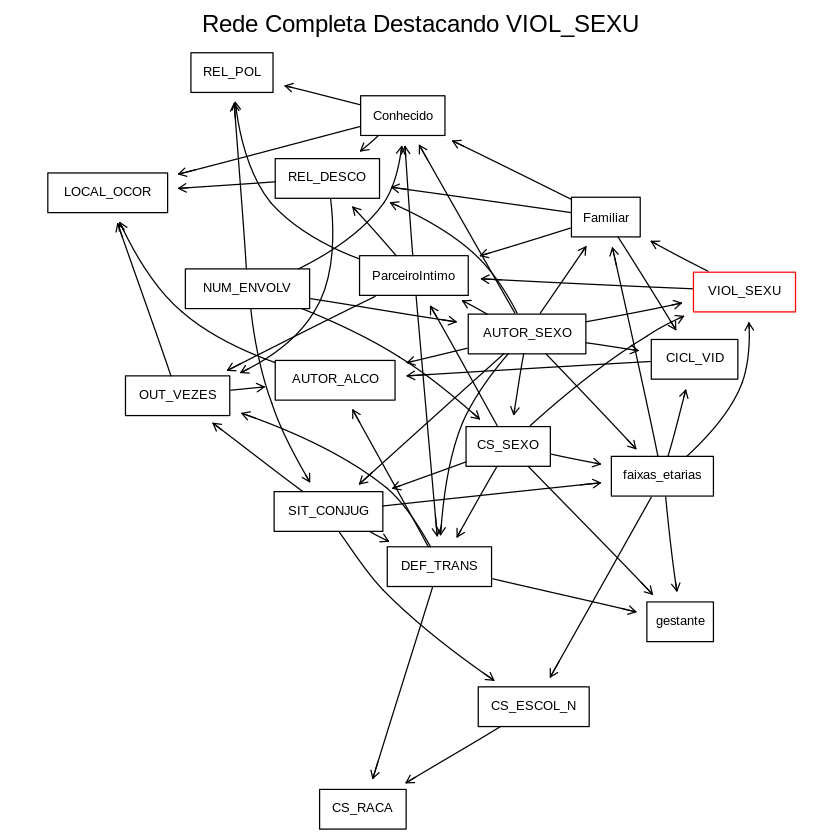

In [ ]:
graphviz.plot(
  rede_full,
  highlight = list(
    nodes = "VIOL_SEXU",     # nó que você quer destacar
    col   = "red",           # cor da borda
    fill  = "transparent"    # fundo transparente
  ),
  layout   = "fdp",
  shape    = "rectangle",
  fontsize = 12,
  main     = "Rede Completa Destacando VIOL_SEXU"
)


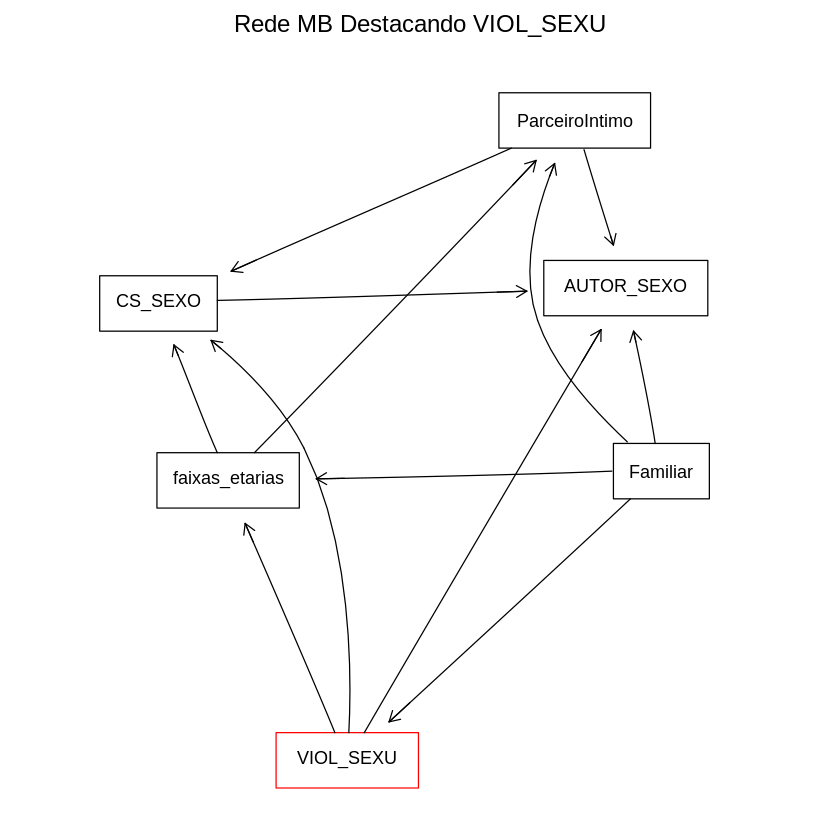

In [ ]:
graphviz.plot(
  rede_mb_sem,
  highlight = list(
    nodes = "VIOL_SEXU",     # nó que você quer destacar
    col   = "red",           # cor da borda
    fill  = "transparent"    # fundo transparente
  ),
  layout   = "fdp",
  shape    = "rectangle",
  fontsize = 12,
  main     = "Rede MB Destacando VIOL_SEXU"
)

In [23]:
rede_ajustada <- bn.fit(rede_full, data = dadosrede1)

In [24]:
rede_ajustada_mb <- bn.fit(rede_mb_sem, data = dados_mb)

In [25]:
install.packages("gRain")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gRbase’, ‘igraph’, ‘RcppArmadillo’, ‘RcppEigen’




In [26]:
library(gRain)

Loading required package: gRbase


Attaching package: ‘gRbase’


The following objects are masked from ‘package:bnlearn’:

    ancestors, children, nodes, parents




In [27]:
rede_grain <- as.grain(rede_ajustada)
prob_violencia <- querygrain(rede_grain, nodes = "VIOL_SEXU")$VIOL_SEXU[1]
cat("Probabilidade marginal de violência sexual:", round(prob_violencia, 4))

Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in LOCAL_OCOR, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in DEF_TRANS, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in gestante, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in OUT_VEZES, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in AUTOR_ALCO, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in CICL_VID, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in REL_POL, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in REL_DESCO, replaced with a u

Probabilidade marginal de violência sexual: 0.1282

In [28]:
querygrain(rede_grain, nodes = "VIOL_SEXU")

$VIOL_SEXU
VIOL_SEXU
        1         2         9 
0.1282042 0.8513474 0.0204484

In [29]:
rede_grain_mb <- as.grain(rede_ajustada_mb)
prob_violencia <- querygrain(rede_grain_mb, nodes = "VIOL_SEXU")$VIOL_SEXU[1]
cat("Probabilidade marginal de violência sexual:", round(prob_violencia, 4))

Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in CS_SEXO, replaced with a uniform distribution.”
Warning message in from.bn.fit.to.grain(x):
“NaN conditional probabilities in AUTOR_SEXO, replaced with a uniform distribution.”


Probabilidade marginal de violência sexual: 0.1289

In [30]:
querygrain(rede_grain_mb, nodes = "VIOL_SEXU")

$VIOL_SEXU
VIOL_SEXU
         1          2          9 
0.12892412 0.85076248 0.02031341

In [33]:
set.seed(123)  # Para garantir reprodutibilidade
prob <- cpquery(rede_ajustada_mb, event = (VIOL_SEXU == 1), evidence = TRUE, n = 10e6)
print(prob)


[1] 0.1289364


In [34]:
#Métrica da rede total
dadosrede1<- dadosrede1 %>% filter(VIOL_SEXU %in% c("1", "2"))
set.seed(123)
n <- nrow(dadosrede1)
indices_treino <- sample(seq_len(n), size = 0.7 * n)

dados_treino1 <- dadosrede1[indices_treino, ]
dados_teste1  <- dadosrede1[-indices_treino, ]

for (v in colnames(dados_treino1)) {
  if (is.factor(dados_treino1[[v]])) {
    levels(dados_teste1[[v]]) <- levels(dados_treino1[[v]])
  }
}


estrutura_treino1 <- hc(dados_treino1)  # ou reusar a estrutura do blanket, se quiser
bn_treino1 <- bn.fit(estrutura_treino1, data = dados_treino1, method = "bayes")

pred1 <- predict(bn_treino1, node = "VIOL_SEXU", data = dados_teste1, method = "bayes-lw", n = 10000)

real1 <- dados_teste1$VIOL_SEXU

# Matriz de confusão
confusao1 <- table(Predito = pred1, Real = real1)
confusao1

# Acurácia
acuracia1 <- sum(diag(confusao1)) / sum(confusao1)
acuracia1

# Sensibilidade (para classe "1" = ocorrência)
sens1 <- confusao1["1", "1"] / sum(confusao1[, "1"])
sens1

# Precisão (para classe "1")
prec1 <- confusao1["1", "1"] / sum(confusao1["1", ])
prec1

# F1-score
f11 <- 2 * (prec1 * sens1) / (prec1 + sens1)
f11

Warning message in check.data(x, allow.missing = TRUE):
“variable VIOL_SEXU in the data has levels that are not observed in the data.”
Warning message in check.data(data, allow.missing = TRUE):
“variable VIOL_SEXU in the data has levels that are not observed in the data.”


       Real
Predito      1      2      9
      1  12030   5114      0
      2   6376 116454      0
      9     24    177      0

[1] 0.9165971

[1] 0.6527401

[1] 0.7017032

[1] 0.6763367

In [35]:
#Métricas da rede MB
dados_mb<- dados_mb %>% filter(VIOL_SEXU %in% c("1", "2"))
set.seed(123)
n <- nrow(dados_mb)
indices_treino <- sample(seq_len(n), size = 0.7 * n)

dados_treino <- dados_mb[indices_treino, ]
dados_teste <- dados_mb[-indices_treino, ]

for (v in colnames(dados_treino)) {
  if (is.factor(dados_treino[[v]])) {
    levels(dados_teste[[v]]) <- levels(dados_treino[[v]])
  }
}

estrutura_treino <- hc(dados_treino)  # ou reusar a estrutura do blanket, se quiser
bn_treino <- bn.fit(estrutura_treino, data = dados_treino, method = "bayes")

pred <- predict(bn_treino, node = "VIOL_SEXU", data = dados_teste, method = "bayes-lw", n = 10000)

real <- dados_teste$VIOL_SEXU

# Matriz de confusão
confusao <- table(Predito = pred, Real = real)
confusao

# Acurácia
acuracia <- sum(diag(confusao)) / sum(confusao)
acuracia

# Sensibilidade (para classe "1" = ocorrência)
sens <- confusao["1", "1"] / sum(confusao[, "1"])
sens

# Precisão (para classe "1")
prec <- confusao["1", "1"] / sum(confusao["1", ])
prec

# F1-score
f1 <- 2 * (prec * sens) / (prec + sens)
f1


Warning message in check.data(x, allow.missing = TRUE):
“variable VIOL_SEXU in the data has levels that are not observed in the data.”
Warning message in check.data(data, allow.missing = TRUE):
“variable VIOL_SEXU in the data has levels that are not observed in the data.”


       Real
Predito      1      2      9
      1  11133   3519      0
      2   7287 118190      0
      9     10     36      0

[1] 0.9225825

[1] 0.6040695

[1] 0.759828

[1] 0.6730548

In [36]:
#Métrica Regressão Logística
modelo_logistico <- glm(
  VIOL_SEXU ~ .,
  data = dados_mb,
  family = binomial()
)

# Ajustar com base apenas no treino
modelo_logistico <- glm(
  VIOL_SEXU ~ .,
  data = dados_treino,
  family = binomial()
)

# Probabilidades previstas
prob_preditas <- predict(modelo_logistico, newdata = dados_teste, type = "response")

# Converter para classe: usar limiar 0.5
classe_predita <- ifelse(prob_preditas >= 0.5, "1", "2")

# Transformar em fator para comparação
classe_predita <- factor(classe_predita, levels = levels(dados_teste$VIOL_SEXU))

# Matriz de confusão
confusao_log <- table(Predito = classe_predita, Real = dados_teste$VIOL_SEXU)
confusao_log

# Acurácia
acuracia_log <- sum(diag(confusao_log)) / sum(confusao_log)

# Sensibilidade (para classe "1")
sens_log <- confusao_log["1", "1"] / sum(confusao_log[, "1"])

# Precisão
prec_log <- confusao_log["1", "1"] / sum(confusao_log["1", ])

# F1-score
f1_log <- 2 * (prec_log * sens_log) / (prec_log + sens_log)

# Mostrar as métricas
acuracia_log
sens_log
prec_log
f1_log

       Real
Predito      1      2      9
      1   7858 118583      0
      2  10567   3147      0
      9      0      0      0

[1] 0.07852021

[1] 0.4264858

[1] 0.06214756

[1] 0.1084865

In [37]:
set.seed(123)
cpquery(rede_ajustada_mb, event = (VIOL_SEXU == 1), evidence = (CS_SEXO== "F"), n=10e6)

[1] 0.1635478

In [38]:
set.seed(123)
cpquery(rede_ajustada_mb, event = (VIOL_SEXU == 1), evidence = (CS_SEXO== "M"), n=10e6)

[1] 0.04621355

In [39]:
library(scales)


In [41]:
library(ggplot2)

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


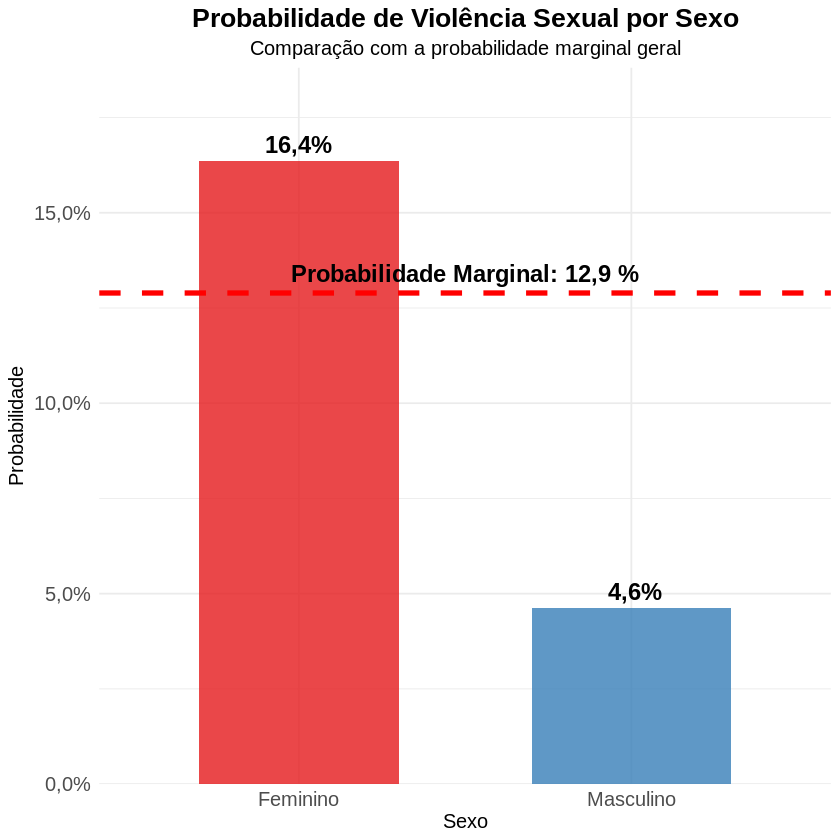

In [42]:
# Calcular probabilidades com reprodutibilidade
set.seed(123)
prob_marginal <- cpquery(rede_ajustada_mb,
                         event = (VIOL_SEXU == 1),
                         evidence = TRUE,
                         n = 10e6)

set.seed(123)
prob_F <- cpquery(rede_ajustada_mb,
                  event = (VIOL_SEXU == 1),
                  evidence = (CS_SEXO == "F"),
                  n = 10e6)

set.seed(123)
prob_M <- cpquery(rede_ajustada_mb,
                  event = (VIOL_SEXU == 1),
                  evidence = (CS_SEXO == "M"),
                  n = 10e6)

# Criar dataframe
dados <- data.frame(
  Sexo = c("Feminino", "Masculino"),
  Probabilidade = c(prob_F, prob_M)
)



ggplot(dados, aes(x = Sexo, y = Probabilidade)) +
  # Barras para probabilidades por sexo
  geom_bar(stat = "identity",
           aes(fill = Sexo),
           width = 0.6,
           alpha = 0.8) +
  # Linha para probabilidade marginal
  geom_hline(yintercept = prob_marginal,
             color = "red",
             linetype = "dashed",
             size = 1.5) +
  # Texto para valores das barras, com vírgula
  geom_text(aes(label = paste0(format(Probabilidade * 100,
                                      digits = 2,
                                      nsmall = 1,
                                      decimal.mark = ","), "%")),
            vjust = -0.5,
            size = 5,
            fontface = "bold") +
  # Texto para linha marginal, com vírgula
  annotate("text",
           x = 1.5,
           y = prob_marginal + 0.005,
           label = paste("Probabilidade Marginal:",
                         format(prob_marginal * 100,
                                digits = 2,
                                nsmall = 1,
                                decimal.mark = ","), "%"),
           color = "black",
           size = 5,
           fontface = "bold") +
  scale_fill_manual(values = c("Feminino" = "#E41A1C", "Masculino" = "#377EB8")) +
  # Eixo Y com vírgula e percentual
  scale_y_continuous(labels = function(x) paste0(format(x * 100,
                                                        digits = 2,
                                                        nsmall = 1,
                                                        decimal.mark = ","), "%"),
                     limits = c(0, max(dados$Probabilidade) * 1.15),
                     expand = c(0, 0)) +
  labs(title = "Probabilidade de Violência Sexual por Sexo",
       subtitle = "Comparação com a probabilidade marginal geral",
       x = "Sexo",
       y = "Probabilidade") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    legend.position = "none"
  )

In [43]:
# Vetor das faixas etárias conforme seu banco de dados
faixas <- c("Menor de 1", "1 a 4", "5 a 9", "10 a 14", "15 a 19", "20 a 24",
            "25 a 29", "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54",
            "55 a 59", "60 a 64", "65 a 69", "70 a 74", "75 a 79", "80 a 84",
            "85 a 89", "90 a 94", "95 a 99", "100+")

# Lista para armazenar os resultados
lista_resultados <- list()

# Calcular as probabilidades condicionais por faixa e sexo
for (sexo in c("F", "M")) {
  for (faixa in faixas) {
    set.seed(123)
    prob <- cpquery(rede_ajustada_mb,
                    event = (VIOL_SEXU == 1),
                    evidence = (CS_SEXO == sexo & faixas_etarias == faixa),
                    n = 10e6)

    risco <- ifelse(prob > prob_marginal, "Risco Elevado", "Risco Reduzido")

    lista_resultados[[length(lista_resultados) + 1]] <- data.frame(
      Sexo = ifelse(sexo == "F", "Feminino", "Masculino"),
      Faixa_Etaria = faixa,
      Probabilidade = prob,
      Risco = risco
    )
  }
}

# Juntar os resultados em um único data.frame
tabela_resultados <- do.call(rbind, lista_resultados)

# Garantir a ordem correta das faixas etárias no gráfico
tabela_resultados$Faixa_Etaria <- factor(tabela_resultados$Faixa_Etaria, levels = faixas)

# Verificando a estrutura
str(tabela_resultados)


'data.frame':	44 obs. of  4 variables:
 $ Sexo         : chr  "Feminino" "Feminino" "Feminino" "Feminino" ...
 $ Faixa_Etaria : Factor w/ 22 levels "Menor de 1","1 a 4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Probabilidade: num  0.117 0.397 0.552 0.45 0.157 ...
 $ Risco        : chr  "Risco Reduzido" "Risco Elevado" "Risco Elevado" "Risco Elevado" ...


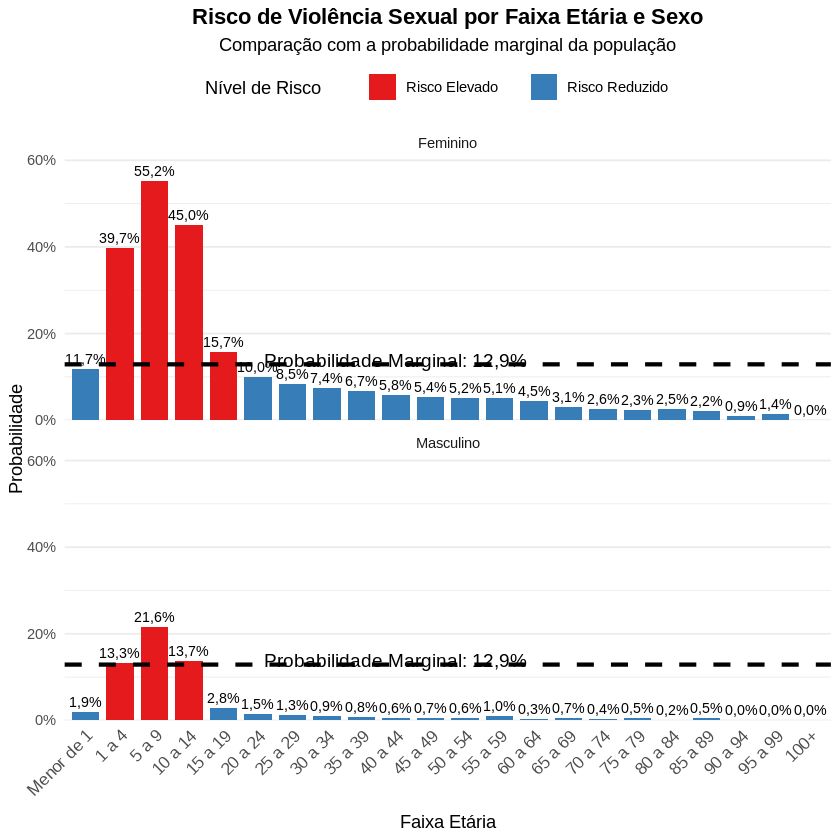

In [44]:


p <- ggplot(tabela_resultados,
            aes(x = factor(Faixa_Etaria, levels = faixas),
                y = Probabilidade,
                fill = Risco,
                group = Sexo)) +

  geom_bar(stat = "identity",
           position = position_dodge(width = 0.9),
           width = 0.8) +

  geom_hline(yintercept = prob_marginal,
             color = "black",
             linetype = "dashed",
             size = 1.2) +

  # Aqui está o ajuste com vírgula
  geom_text(aes(label = gsub("\\.", ",", sprintf("%.1f%%", Probabilidade * 100))),
            position = position_dodge(width = 0.9),
            vjust = -0.5,
            size = 3) +

  # E aqui também, usando gsub para substituir o ponto por vírgula
  annotate("text",
           x = 10,
           y = prob_marginal + 0.01,
           label = gsub("\\.", ",", sprintf("Probabilidade Marginal: %.1f%%", prob_marginal * 100)),
           color = "black",
           size = 4) +

  scale_fill_manual(values = c("Risco Elevado" = "#E41A1C",
                               "Risco Reduzido" = "#377EB8")) +

  scale_y_continuous(labels = function(x) gsub("\\.", ",", sprintf("%.0f%%", x * 100)),
                     expand = expansion(mult = c(0, 0.1))) +

  labs(title = "Risco de Violência Sexual por Faixa Etária e Sexo",
       subtitle = "Comparação com a probabilidade marginal da população",
       x = "Faixa Etária",
       y = "Probabilidade",
       fill = "Nível de Risco") +

  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
        plot.title = element_text(hjust = 0.5, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5),
        legend.position = "top",
        panel.grid.major.x = element_blank())

# Facetas por sexo
p + facet_wrap(~ Sexo, ncol = 1)


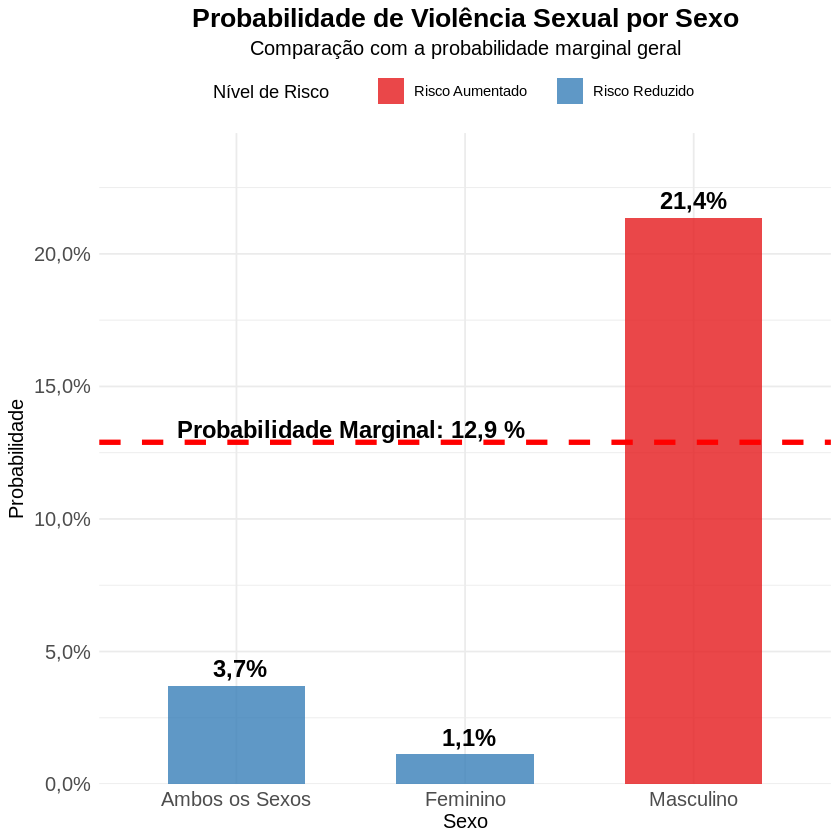

In [60]:
# Calcular probabilidades com reprodutibilidade
set.seed(123)
prob_marginal <- cpquery(rede_ajustada_mb,
                         event = (VIOL_SEXU == 1),
                         evidence = TRUE,
                         n = 10e6)

set.seed(123)
prob_AUTOR_M <- cpquery(rede_ajustada_mb,
                  event = (VIOL_SEXU == 1),
                  evidence = (AUTOR_SEXO == 1),
                  n = 10e6)

set.seed(123)
prob_AUTOR_F <- cpquery(rede_ajustada_mb,
                  event = (VIOL_SEXU == 1),
                  evidence = (AUTOR_SEXO == 2),
                  n = 10e6)

set.seed(123)
prob_AUTOR_M_F <- cpquery(rede_ajustada_mb,
                  event = (VIOL_SEXU == 1),
                  evidence = (AUTOR_SEXO == 3),
                  n = 10e6)

# Criar dataframe
dados <- data.frame(
  Sexo = c("Masculino", "Feminino", "Ambos os Sexos"),
  Probabilidade = c(prob_AUTOR_M , prob_AUTOR_F, prob_AUTOR_M_F)
)

# Classificar risco
dados$Risco <- ifelse(dados$Probabilidade > prob_marginal,
                      "Risco Aumentado", "Risco Reduzido")

cores_risco <- c("Risco Aumentado" = "#E41A1C",  # vermelho
                "Risco Reduzido" = "#377EB8")   # azul

ggplot(dados, aes(x = Sexo, y = Probabilidade, fill = Risco)) +
  geom_bar(stat = "identity", width = 0.6, alpha = 0.8) +
  geom_hline(yintercept = prob_marginal,
             color = "red",
             linetype = "dashed",
             size = 1.5) +
  geom_text(aes(label = paste0(format(Probabilidade * 100,
                                      digits = 2,
                                      nsmall = 1,
                                      decimal.mark = ","), "%")),
            vjust = -0.5,
            size = 5,
            fontface = "bold") +
  annotate("text",
           x = 1.5,
           y = prob_marginal + 0.005,
           label = paste("Probabilidade Marginal:",
                         format(prob_marginal * 100,
                                digits = 2,
                                nsmall = 1,
                                decimal.mark = ","), "%"),
           color = "black",
           size = 5,
           fontface = "bold") +
  scale_fill_manual(values = cores_risco) +
  scale_y_continuous(labels = function(x) paste0(format(x * 100,
                                                        digits = 2,
                                                        nsmall = 1,
                                                        decimal.mark = ","), "%"),
                     limits = c(0, max(dados$Probabilidade) * 1.15),
                     expand = c(0, 0)) +
  labs(title = "Probabilidade de Violência Sexual por Sexo",
       subtitle = "Comparação com a probabilidade marginal geral",
       x = "Sexo",
       y = "Probabilidade",
       fill = "Nível de Risco") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    legend.position = "top"
  )


In [47]:
set.seed(123)
cpquery(rede_ajustada_mb, event = (VIOL_SEXU == 1), evidence = (Familiar== "1"), n=10e6)

[1] 0.1496528

In [48]:
set.seed(123)
cpquery(rede_ajustada_mb, event = (VIOL_SEXU == 1), evidence = (ParceiroIntimo== "1"), n=10e6)

[1] 0.07576796

In [49]:
variaveis_expandido <- c(mb_viol, "REL_DESCO", "LOCAL_OCOR","CS_ESCOL_N","gestante", "VIOL_SEXU", "AUTOR_ALCO",
                                  "OUT_VEZES", "CS_RACA")
dados_mb_expandido <- dadosrede1[, variaveis_expandido]
dados_mb_expandido <- dados_mb_expandido %>%
  mutate(across(everything(), ~ droplevels(as.factor(.))))

In [50]:
set.seed(123)
rede_mb_expandida <- structural.em(
  dados_mb_expandido,
  maximize      = "hc",
  maximize.args = list(score = "bic"),
  fit           = "mle",
  impute        = "bayes-lw"
)

In [55]:
#Métricas da rede MB_expandido
dados_mb_expandido<- dados_mb_expandido %>% filter(VIOL_SEXU %in% c("1", "2"))
set.seed(123)
n <- nrow(dados_mb)
indices_treino <- sample(seq_len(n), size = 0.7 * n)

dados_treino <- dados_mb_expandido[indices_treino, ]
dados_teste <- dados_mb_expandido[-indices_treino, ]

for (v in colnames(dados_treino)) {
  if (is.factor(dados_treino[[v]])) {
    levels(dados_teste[[v]]) <- levels(dados_treino[[v]])
  }
}

estrutura_treino <- hc(dados_treino)  # ou reusar a estrutura do blanket, se quiser
bn_treino <- bn.fit(estrutura_treino, data = dados_treino, method = "bayes")

pred <- predict(bn_treino, node = "VIOL_SEXU", data = dados_teste, method = "bayes-lw", n = 10000)

real <- dados_teste$VIOL_SEXU

# Matriz de confusão
confusao <- table(Predito = pred, Real = real)
confusao

# Acurácia
acuracia <- sum(diag(confusao)) / sum(confusao)
acuracia

# Sensibilidade (para classe "1" = ocorrência)
sens <- confusao["1", "1"] / sum(confusao[, "1"])
sens

# Precisão (para classe "1")
prec <- confusao["1", "1"] / sum(confusao["1", ])
prec

# F1-score
f1 <- 2 * (prec * sens) / (prec + sens)
f1


       Real
Predito      1      2
      1  11946   7082
      2   6484 114663

[1] 0.903221

[1] 0.6481823

[1] 0.6278116

[1] 0.6378344

In [61]:
#Métrica Regressão Logística
modelo_logistico <- glm(
  VIOL_SEXU ~ .,
  data = dados_mb_expandido,
  family = binomial()
)

# Ajustar com base apenas no treino
modelo_logistico <- glm(
  VIOL_SEXU ~ .,
  data = dados_treino,
  family = binomial()
)

# Probabilidades previstas
prob_preditas <- predict(modelo_logistico, newdata = dados_teste, type = "response")

# Converter para classe: usar limiar 0.5
classe_predita <- ifelse(prob_preditas >= 0.5, "1", "2")

# Transformar em fator para comparação
classe_predita <- factor(classe_predita, levels = levels(dados_teste$VIOL_SEXU))

# Matriz de confusão
confusao_log <- table(Predito = classe_predita, Real = dados_teste$VIOL_SEXU)
confusao_log

# Acurácia
acuracia_log <- sum(diag(confusao_log)) / sum(confusao_log)

# Sensibilidade (para classe "1")
sens_log <- confusao_log["1", "1"] / sum(confusao_log[, "1"])

# Precisão
prec_log <- confusao_log["1", "1"] / sum(confusao_log["1", ])

# F1-score
f1_log <- 2 * (prec_log * sens_log) / (prec_log + sens_log)

# Mostrar as métricas
acuracia_log
sens_log
prec_log
f1_log

       Real
Predito      1      2
      1   6641 111249
      2  10875   3028

[1] 0.07336505

[1] 0.3791391

[1] 0.05633217

[1] 0.09809019

In [62]:
# Ajustar os parâmetros com suavização bayesiana
rede_mb_expandida_ajustada <- bn.fit(rede_mb_expandida, data = dados_mb_expandido, method = "bayes")

In [63]:
set.seed(123)  # Para garantir reprodutibilidade
prob <- cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = TRUE, n = 10e6)
print(prob)


[1] 0.1303902


In [64]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (gestante== "Sim"), n=10e6)

[1] 0.3949668

In [65]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (REL_DESCO== "1"), n=10e6)

[1] 0.2372096

In [66]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (AUTOR_ALCO== "1"), n=10e6)

[1] 0.116102

In [67]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (OUT_VEZES== "1"), n=10e6)

[1] 0.122151

In [68]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N== "00"), n=10e6) #analfabeta

[1] 0.06521545

In [69]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N==c("01", "02")), n=10e6)#fundamental 1

[1] 0.1834568

In [70]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N==c("03", "04")), n=10e6)#fundamental 2

[1] 0.177009

In [72]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N==c("05", "06")), n=10e6)#médio

[1] 0.08354666

In [71]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N==c("07", "08")), n=10e6) #superior

[1] 0.06059997

In [73]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_ESCOL_N==c("10")), n=10e6)# não se aplica

[1] 0.257793

In [74]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (LOCAL_OCOR== "01"), n=10e6) #residência

[1] 0.1264528

In [75]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (LOCAL_OCOR== "03"), n=10e6) #escola

[1] 0.1123663

In [76]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (LOCAL_OCOR== "05"), n=10e6)#bar ou similar

[1] 0.1297388

In [77]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (LOCAL_OCOR== "06"), n=10e6)#via pública

[1] 0.1487973

In [78]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_RACA== 1), n=10e6) #branca

[1] 0.1256294

In [79]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_RACA== 2), n=10e6) #preta

[1] 0.131308

In [80]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_RACA== 3), n=10e6) #amarela

[1] 0.1261339

In [81]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_RACA== 4), n=10e6) #parda

[1] 0.1348582

In [82]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada, event = (VIOL_SEXU == 1), evidence = (CS_RACA== 5), n=10e6) #indígena

[1] 0.1516474

In [83]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [84]:
library(patchwork)

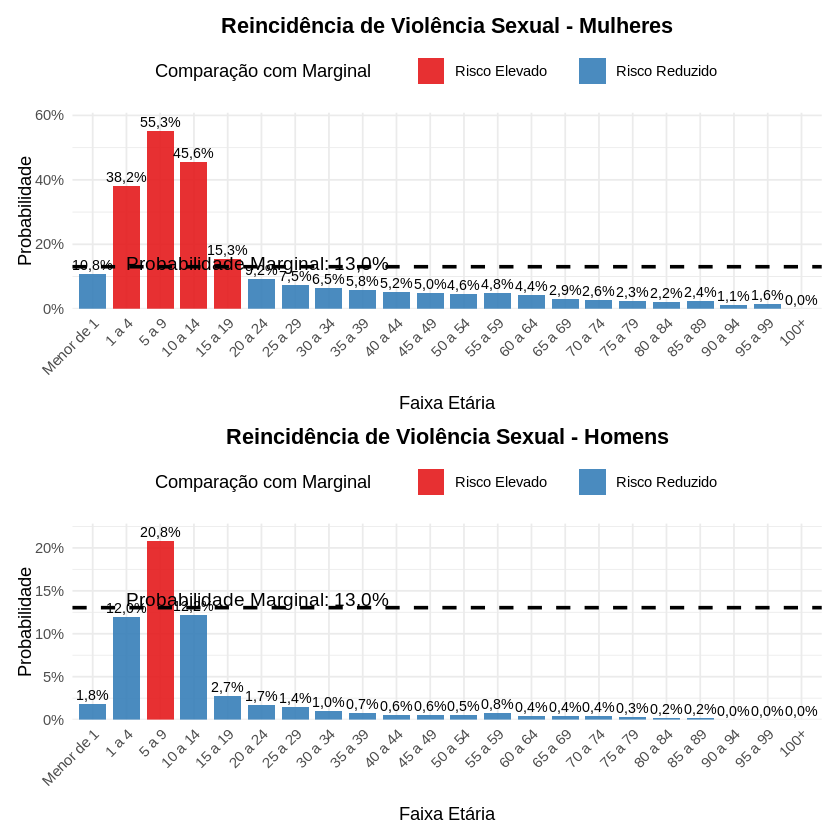

In [85]:
# Vetores de faixas
faixas <- c("Menor de 1", "1 a 4", "5 a 9", "10 a 14", "15 a 19", "20 a 24",
            "25 a 29", "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54",
            "55 a 59", "60 a 64", "65 a 69", "70 a 74", "75 a 79", "80 a 84",
            "85 a 89", "90 a 94", "95 a 99", "100+")

# Calcular probabilidade marginal
set.seed(123)
prob_marginal <- cpquery(rede_mb_expandida_ajustada,
                         event = (VIOL_SEXU == 1),
                         evidence = TRUE,
                         n = 10e6)

# Criar estrutura para armazenar os dados
lista_resultados <- list()

# Loop por sexo e faixa etária com reincidência
for (sexo in c("F", "M")) {
  for (faixa in faixas) {
    set.seed(123)
    prob <- cpquery(rede_mb_expandida_ajustada,
                    event = (VIOL_SEXU == 1),
                    evidence = (CS_SEXO == sexo & faixas_etarias == faixa & OUT_VEZES == 1),
                    n = 10e6)

    cor <- ifelse(prob > prob_marginal, "Risco Elevado", "Risco Reduzido")

    lista_resultados[[length(lista_resultados) + 1]] <- data.frame(
      Sexo = ifelse(sexo == "F", "Feminino", "Masculino"),
      Faixa_Etaria = faixa,
      Probabilidade = prob,
      Cor = cor
    )
  }
}

# Juntar em um único data.frame
df_resultados <- do.call(rbind, lista_resultados)

# Ajustar ordem das faixas
df_resultados$Faixa_Etaria <- factor(df_resultados$Faixa_Etaria, levels = faixas)

# Função para plotar gráfico por sexo
plot_por_sexo <- function(df, sexo, titulo) {
  df_filtrado <- df[df$Sexo == sexo, ]

  ggplot(df_filtrado, aes(x = Faixa_Etaria, y = Probabilidade, fill = Cor)) +
    geom_bar(stat = "identity", width = 0.8, alpha = 0.9) +
    geom_hline(yintercept = prob_marginal, color = "black", linetype = "dashed", size = 1) +
    geom_text(aes(label = gsub("\\.", ",", sprintf("%.1f%%", Probabilidade * 100))),
              vjust = -0.4, size = 3) +
    annotate("text",
             x = 2,
             y = prob_marginal + 0.01,
             label = gsub("\\.", ",", sprintf("Probabilidade Marginal: %.1f%%", prob_marginal * 100)),
             color = "black", size = 4, hjust = 0) +
    scale_fill_manual(values = c("Risco Elevado" = "#E41A1C", "Risco Reduzido" = "#377EB8")) +
    scale_y_continuous(labels = function(x) gsub("\\.", ",", sprintf("%.0f%%", x * 100)),
                       expand = expansion(mult = c(0, 0.1))) +
    labs(title = titulo,
         x = "Faixa Etária",
         y = "Probabilidade",
         fill = "Comparação com Marginal") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
          plot.title = element_text(hjust = 0.5, face = "bold", size = 13),
          legend.position = "top")
}

# Gerar gráficos individuais
grafico_f <- plot_por_sexo(df_resultados, "Feminino", "Reincidência de Violência Sexual - Mulheres")
grafico_m <- plot_por_sexo(df_resultados, "Masculino", "Reincidência de Violência Sexual - Homens")

# Combinar com patchwork
grafico_f / grafico_m + plot_layout(ncol = 1)


In [109]:
lista_resultados

Sexo,Faixa_Etaria,Probabilidade,Cor
<chr>,<chr>,<dbl>,<chr>
Feminino,Menor de 1,0.1079084,Risco Reduzido
Sexo,Faixa_Etaria,Probabilidade,Cor
<chr>,<chr>,<dbl>,<chr>
Feminino,1 a 4,0.3818236,Risco Elevado
Sexo,Faixa_Etaria,Probabilidade,Cor
<chr>,<chr>,<dbl>,<chr>
Feminino,5 a 9,0.5529813,Risco Elevado
Sexo,Faixa_Etaria,Probabilidade,Cor
<chr>,<chr>,<dbl>,<chr>


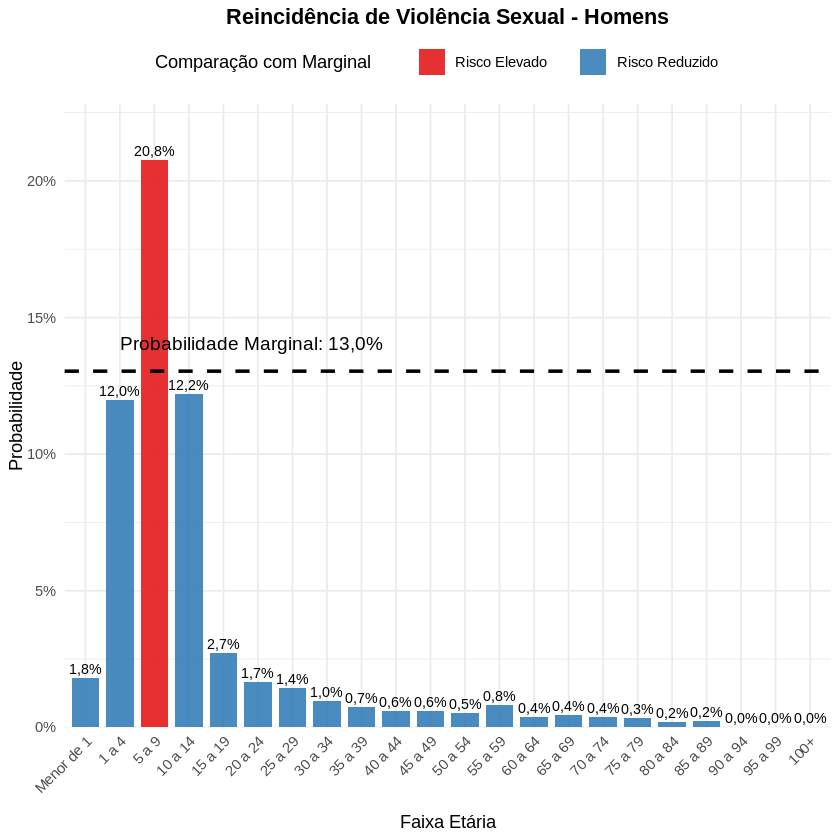

In [108]:
grafico_m

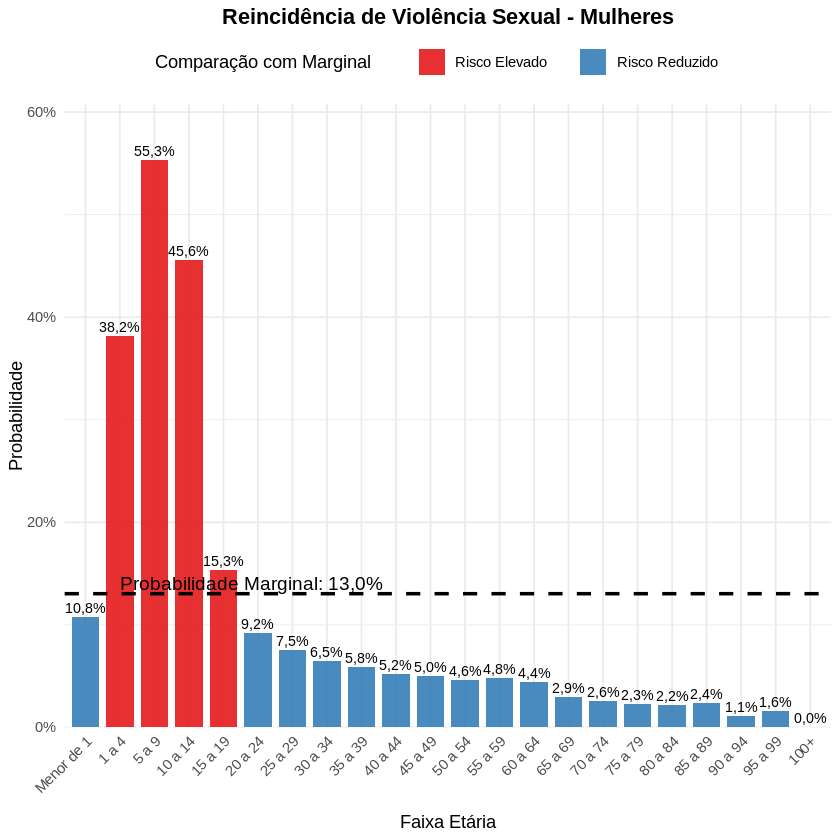

In [107]:
grafico_f

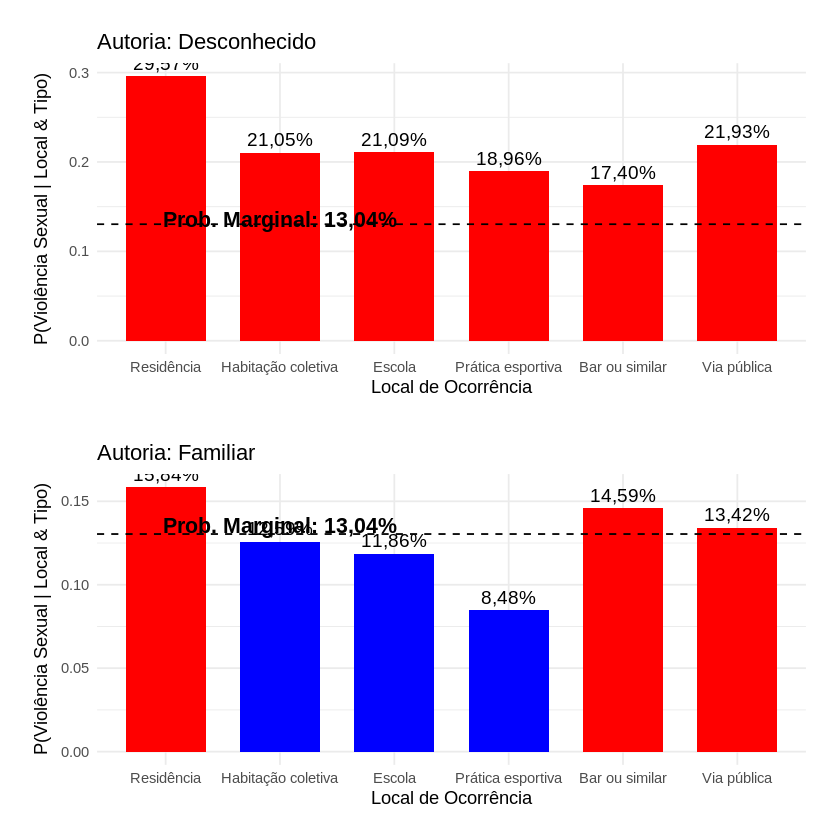

In [112]:
# Nomes dos locais
nomes_locais <- c(
  "01" = "Residência",
  "02" = "Habitação coletiva",
  "03" = "Escola",
  "04" = "Prática esportiva",
  "05" = "Bar ou similar",
  "06" = "Via pública"
)

# Probabilidade marginal
set.seed(123)
prob_marginal <- cpquery(rede_mb_expandida_ajustada,
                         event = (VIOL_SEXU == 1),
                         evidence = TRUE,
                         n = 10e6)

# --- MANUALMENTE para REL_DESCO == 1 ---

probs_desco <- c()
for (cod in names(nomes_locais)) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((LOCAL_OCOR == cod) & (REL_DESCO == 1)),
               n = 10e6)
  probs_desco <- c(probs_desco, p)
}

df_desco <- data.frame(
  Local = nomes_locais,
  Probabilidade = probs_desco,
  Acima_Marginal = probs_desco > prob_marginal,
  Tipo = "Desconhecido"
)

# --- MANUALMENTE para Familiar == 1 ---

probs_fam <- c()
for (cod in names(nomes_locais)) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((LOCAL_OCOR == cod) & (Familiar == 1)),
               n = 10e6)
  probs_fam <- c(probs_fam, p)
}

df_fam <- data.frame(
  Local = nomes_locais,
  Probabilidade = probs_fam,
  Acima_Marginal = probs_fam > prob_marginal,
  Tipo = "Familiar"
)

# Função de plotagem
plot_probs <- function(df, titulo) {
  ggplot(df, aes(x = factor(Local, levels = nomes_locais), y = Probabilidade, fill = Acima_Marginal)) +
    geom_col(width = 0.7) +
    geom_hline(yintercept = prob_marginal, linetype = "dashed", color = "black") +
    annotate("text",
             x = 2,
             y = prob_marginal + 0.005,
             label = paste0("Prob. Marginal: ",
                            formatC(prob_marginal * 100, digits = 2, format = "f", decimal.mark = ","), "%"),
             size = 4.5,
             fontface = "bold",
             color = "black") +
    geom_text(aes(label = paste0(formatC(100 * Probabilidade, format = "f", digits = 2, decimal.mark = ","), "%")),
              vjust = -0.5, size = 4) +
    scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "blue")) +
    labs(title = titulo, x = "Local de Ocorrência", y = "P(Violência Sexual | Local & Tipo)") +
    theme_minimal() +
    theme(legend.position = "none",
          axis.text.x = element_text(angle = 0, hjust = 0.5),
          plot.margin = margin(15, 15, 15, 15))
}

# Plots
grafico1 <- plot_probs(df_desco, "Autoria: Desconhecido")
grafico2 <- plot_probs(df_fam, "Autoria: Familiar")

# Gráficos empilhados
grafico1/ grafico2


In [110]:
probs_desco


[1] 0.2957388 0.2105468 0.2108755 0.1895694 0.1739569 0.2193048

In [111]:
probs_fam

[1] 0.15841118 0.12591096 0.11863732 0.08480976 0.14591458 0.13423158

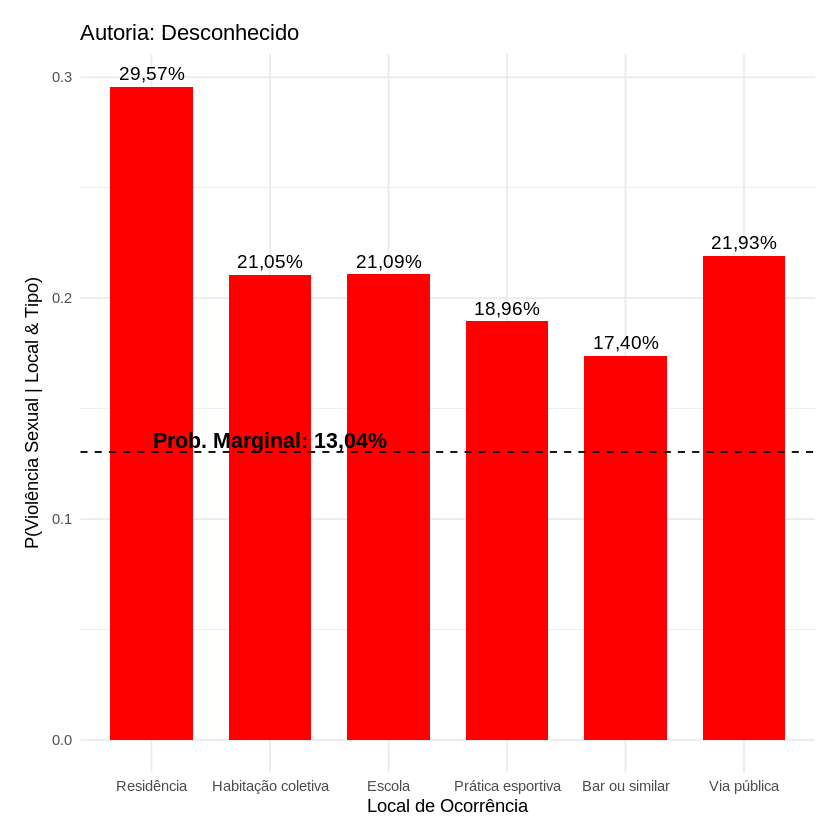

In [113]:
grafico1

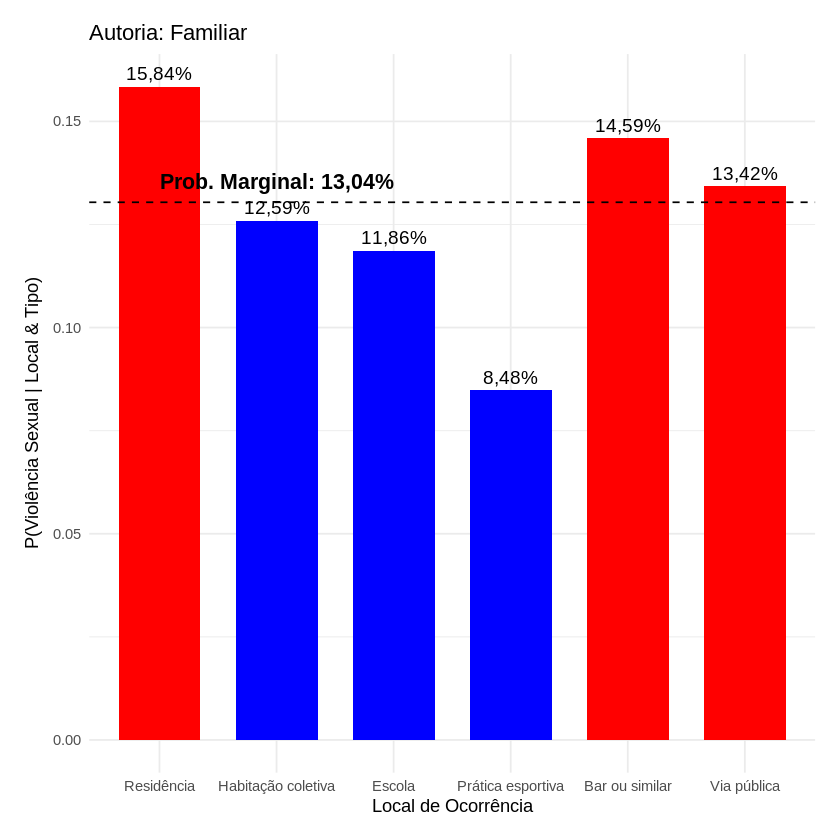

In [114]:
grafico2

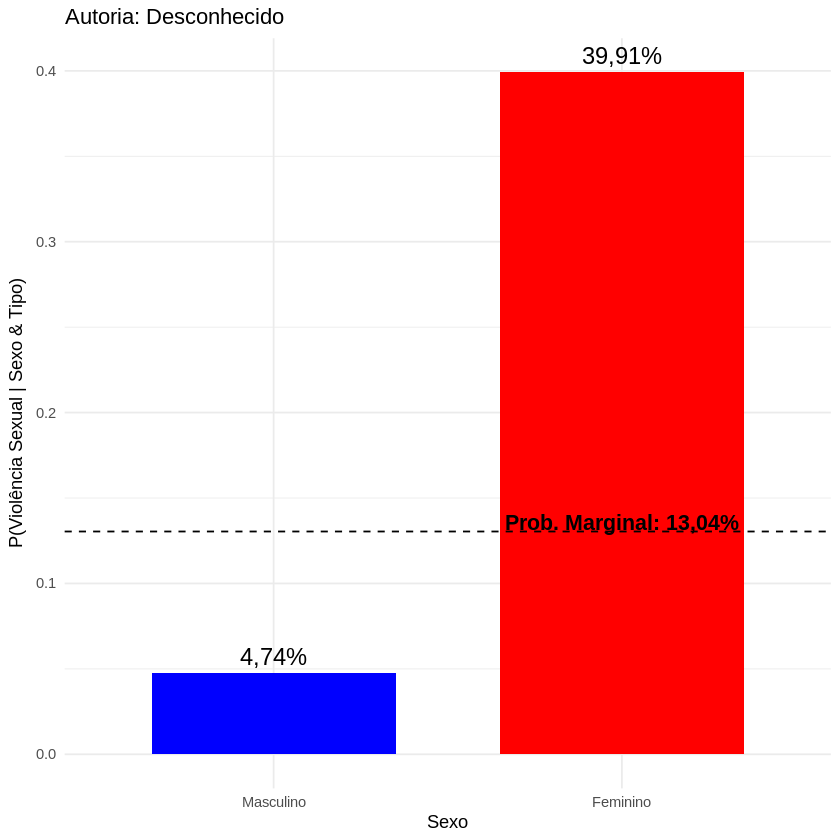

In [103]:
grafico1_sexo

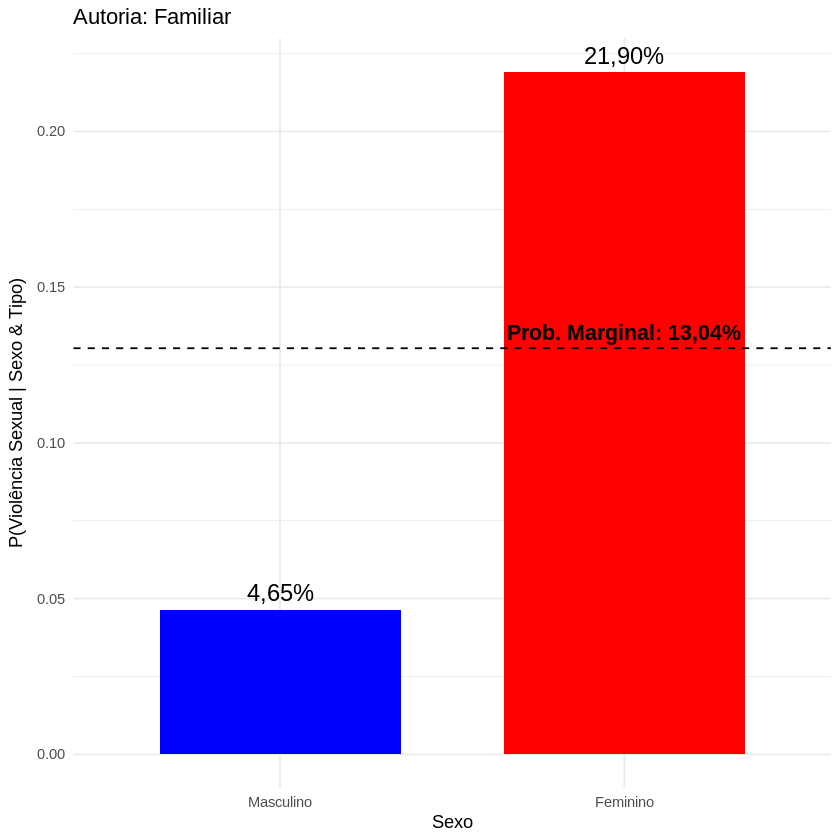

In [104]:
grafico2_sexo

In [87]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (LOCAL_OCOR == "01") & (Familiar== 1),
                n = 10e6)

[1] 0.1584112

In [88]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (LOCAL_OCOR == "01") & (REL_DESCO== 1),
                n = 10e6)

[1] 0.2957388

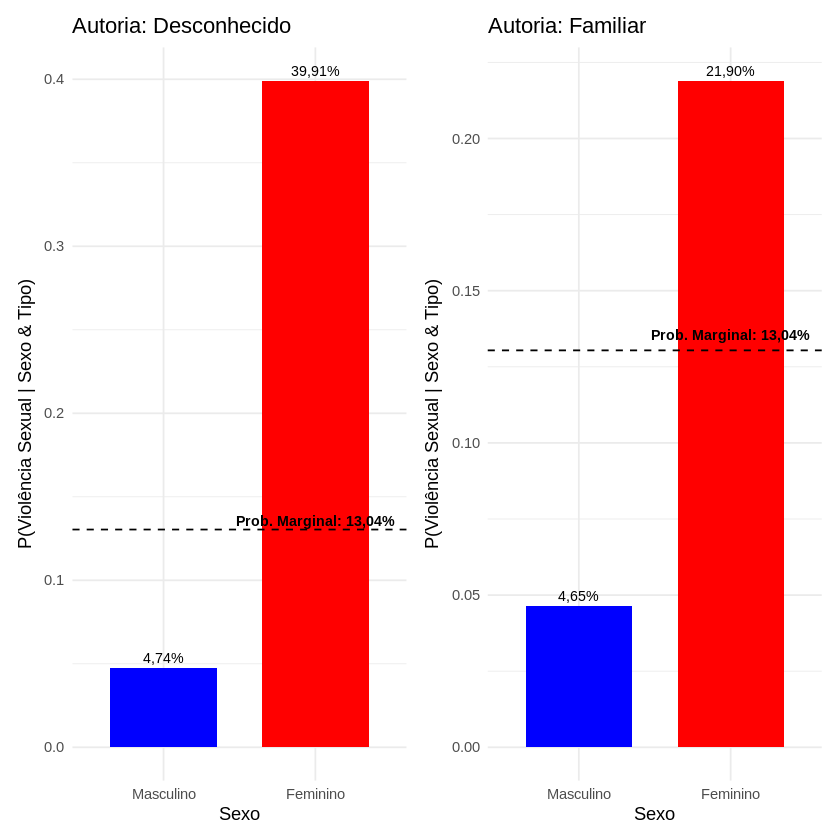

In [119]:
# Nomes para sexo (ajuste conforme seu dado)
nomes_sexo <- c("M" = "Masculino", "F" = "Feminino")

# Probabilidades para REL_DESCO == 1
probs_desco_sexo <- c()
for (sexo in names(nomes_sexo)) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((CS_SEXO == sexo) & (REL_DESCO == 1)),
               n = 10e6)
  probs_desco_sexo <- c(probs_desco_sexo, p)
}

df_desco_sexo <- data.frame(
  Sexo = nomes_sexo,
  Probabilidade = probs_desco_sexo,
  Acima_Marginal = probs_desco_sexo > prob_marginal,
  Tipo = "Desconhecido"
)

# Probabilidades para Familiar == 1
probs_fam_sexo <- c()
for (sexo in names(nomes_sexo)) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((CS_SEXO == sexo) & (Familiar == 1)),
               n = 10e6)
  probs_fam_sexo <- c(probs_fam_sexo, p)
}

df_fam_sexo <- data.frame(
  Sexo = nomes_sexo,
  Probabilidade = probs_fam_sexo,
  Acima_Marginal = probs_fam_sexo > prob_marginal,
  Tipo = "Familiar"
)

# Função para plotar sexo (adaptada para eixo x diferente)
plot_probs_sexo <- function(df, titulo) {
  ggplot(df, aes(x = factor(Sexo, levels = nomes_sexo), y = Probabilidade, fill = Acima_Marginal)) +
    geom_col(width = 0.7) +
    geom_hline(yintercept = prob_marginal, linetype = "dashed", color = "black") +
    annotate("text",
             x = 2,
             y = prob_marginal + 0.005,
             label = paste0("Prob. Marginal: ",
                            formatC(prob_marginal * 100, digits = 2, format = "f", decimal.mark = ","), "%"),
             size = 3,
             fontface = "bold",
             color = "black") +
    geom_text(aes(label = paste0(formatC(100 * Probabilidade, format = "f", digits = 2, decimal.mark = ","), "%")),
              vjust = -0.5, size = 3) +
    scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "blue")) +
    labs(title = titulo, x = "Sexo", y = "P(Violência Sexual | Sexo & Tipo)") +
    theme_minimal() +
    theme(legend.position = "none")
}

# Gerar gráficos
grafico1_sexo <- plot_probs_sexo(df_desco_sexo, "Autoria: Desconhecido")
grafico2_sexo <- plot_probs_sexo(df_fam_sexo, "Autoria: Familiar")

# Empilhar os gráficos
grafico1_sexo + grafico2_sexo


In [115]:
probs_desco_sexo

[1] 0.04736759 0.39911800

In [116]:
probs_fam_sexo

[1] 0.0464663 0.2189753

In [90]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (CS_SEXO == "M") & (REL_DESCO== 1),
                n = 10e6)

[1] 0.04736759

In [91]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (CS_SEXO == "M") & (Familiar== 1),
                n = 10e6)

[1] 0.0464663

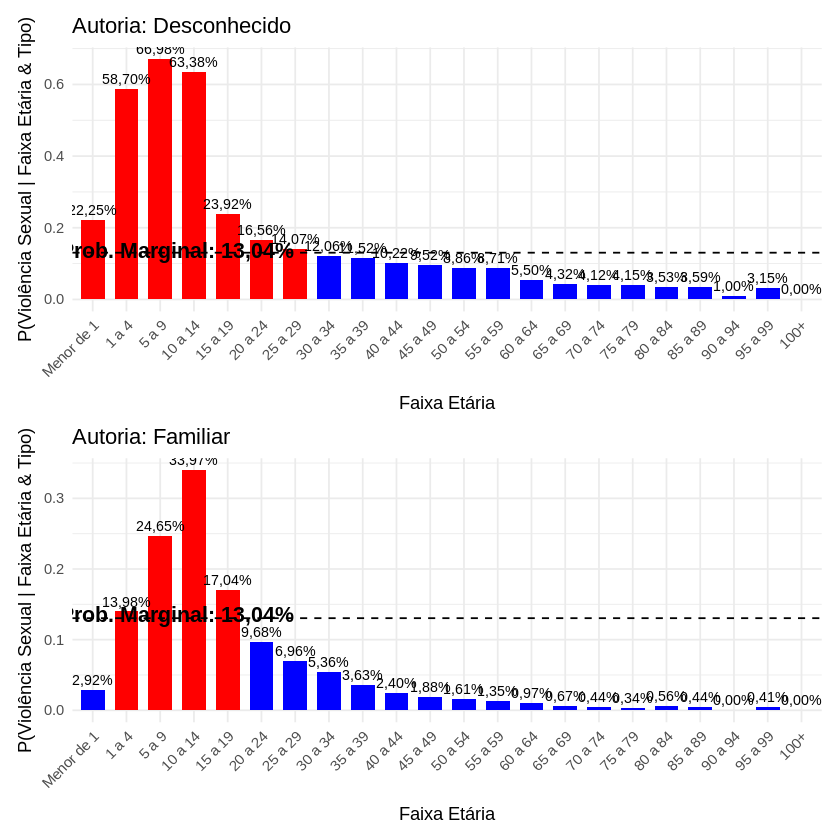

In [97]:


# Sequência exata dos níveis para faixa etária
faixas <- c("Menor de 1", "1 a 4", "5 a 9", "10 a 14", "15 a 19", "20 a 24",
            "25 a 29", "30 a 34", "35 a 39", "40 a 44", "45 a 49", "50 a 54",
            "55 a 59", "60 a 64", "65 a 69", "70 a 74", "75 a 79", "80 a 84",
            "85 a 89", "90 a 94", "95 a 99", "100+")

# Probabilidade marginal (deve estar calculada previamente)
set.seed(123)
prob_marginal <- cpquery(rede_mb_expandida_ajustada,
                         event = (VIOL_SEXU == 1),
                         evidence = TRUE,
                         n = 10e6)

# Calcular probabilidades para REL_DESCO == 1 por faixa etária
probs_desco_faixa <- c()
for (faixa in faixas) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((faixas_etarias == faixa) & (REL_DESCO == 1)),
               n = 10e6)
  probs_desco_faixa <- c(probs_desco_faixa, p)
}

df_desco_faixa <- data.frame(
  Faixa_Etaria = faixas,
  Probabilidade = probs_desco_faixa,
  Acima_Marginal = probs_desco_faixa > prob_marginal,
  Tipo = "Desconhecido"
)

# Calcular probabilidades para Familiar == 1 por faixa etária
probs_fam_faixa <- c()
for (faixa in faixas) {
  set.seed(123)
  p <- cpquery(rede_mb_expandida_ajustada,
               event = (VIOL_SEXU == 1),
               evidence = ((faixas_etarias == faixa) & (Familiar == 1)),
               n = 10e6)
  probs_fam_faixa <- c(probs_fam_faixa, p)
}

df_fam_faixa <- data.frame(
  Faixa_Etaria = faixas,
  Probabilidade = probs_fam_faixa,
  Acima_Marginal = probs_fam_faixa > prob_marginal,
  Tipo = "Familiar"
)

# Função para plotar as faixas etárias mantendo a ordem correta
plot_probs_faixa <- function(df, titulo) {
  ggplot(df, aes(x = factor(Faixa_Etaria, levels = faixas), y = Probabilidade, fill = Acima_Marginal)) +
    geom_col(width = 0.7) +
    geom_hline(yintercept = prob_marginal, linetype = "dashed", color = "black") +
    annotate("text",
             x = 2,
             y = prob_marginal + 0.005,
             label = paste0("Prob. Marginal: ",
                            formatC(prob_marginal * 100, digits = 2, format = "f", decimal.mark = ","), "%"),
             size = 4.5,
             fontface = "bold",
             color = "black") +
    geom_text(aes(label = paste0(formatC(100 * Probabilidade, format = "f", digits = 2, decimal.mark = ","), "%")),
              vjust = -0.5, size = 3) +
    scale_fill_manual(values = c("TRUE" = "red", "FALSE" = "blue")) +
    labs(title = titulo, x = "Faixa Etária", y = "P(Violência Sexual | Faixa Etária & Tipo)") +
    theme_minimal() +
    theme(legend.position = "none",
          axis.text.x = element_text(angle = 45, hjust = 1))
}

# Gerar os gráficos
grafico1_faixa <- plot_probs_faixa(df_desco_faixa, "Autoria: Desconhecido")
grafico2_faixa <- plot_probs_faixa(df_fam_faixa, "Autoria: Familiar")

# Empilhar verticalmente
grafico1_faixa / grafico2_faixa


In [120]:
df_fam_faixa

Faixa_Etaria,Probabilidade,Acima_Marginal,Tipo
<chr>,<dbl>,<lgl>,<chr>
Menor de 1,0.029196264,FALSE,Familiar
1 a 4,0.139831693,TRUE,Familiar
5 a 9,0.246494837,TRUE,Familiar
10 a 14,0.339745501,TRUE,Familiar
15 a 19,0.170402094,TRUE,Familiar
20 a 24,0.096787035,FALSE,Familiar
25 a 29,0.069584925,FALSE,Familiar
30 a 34,0.053562654,FALSE,Familiar
35 a 39,0.036345183,FALSE,Familiar


In [122]:
df_desco_faixa

Faixa_Etaria,Probabilidade,Acima_Marginal,Tipo
<chr>,<dbl>,<lgl>,<chr>
Menor de 1,0.222508591,TRUE,Desconhecido
1 a 4,0.587020839,TRUE,Desconhecido
5 a 9,0.669828991,TRUE,Desconhecido
10 a 14,0.633847359,TRUE,Desconhecido
15 a 19,0.239177444,TRUE,Desconhecido
20 a 24,0.165630218,TRUE,Desconhecido
25 a 29,0.140739177,TRUE,Desconhecido
30 a 34,0.120601866,FALSE,Desconhecido
35 a 39,0.115162651,FALSE,Desconhecido


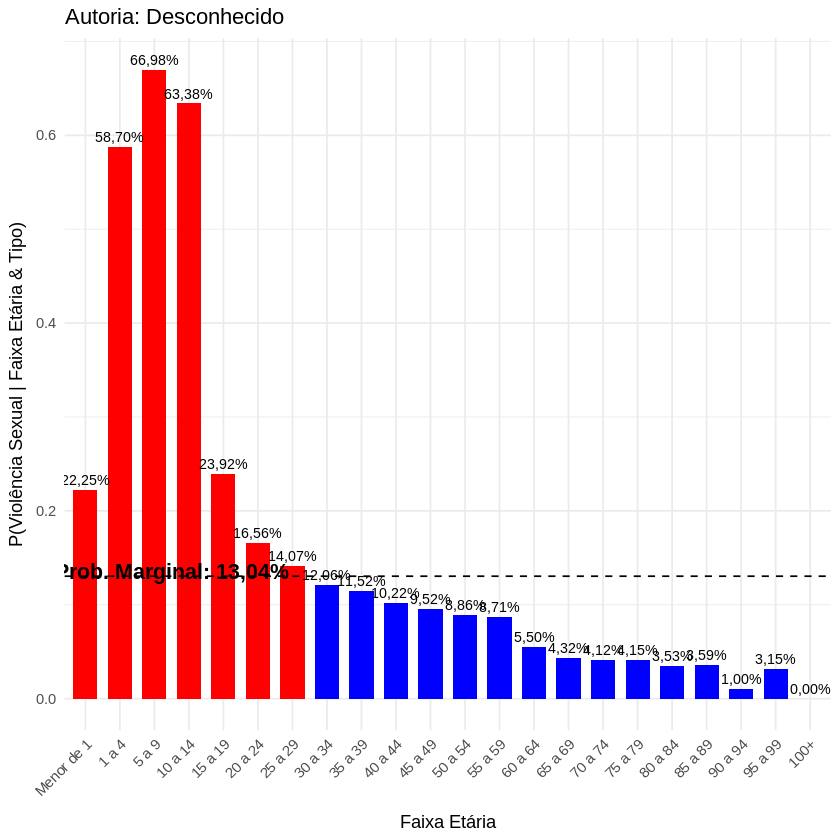

In [105]:
grafico1_faixa

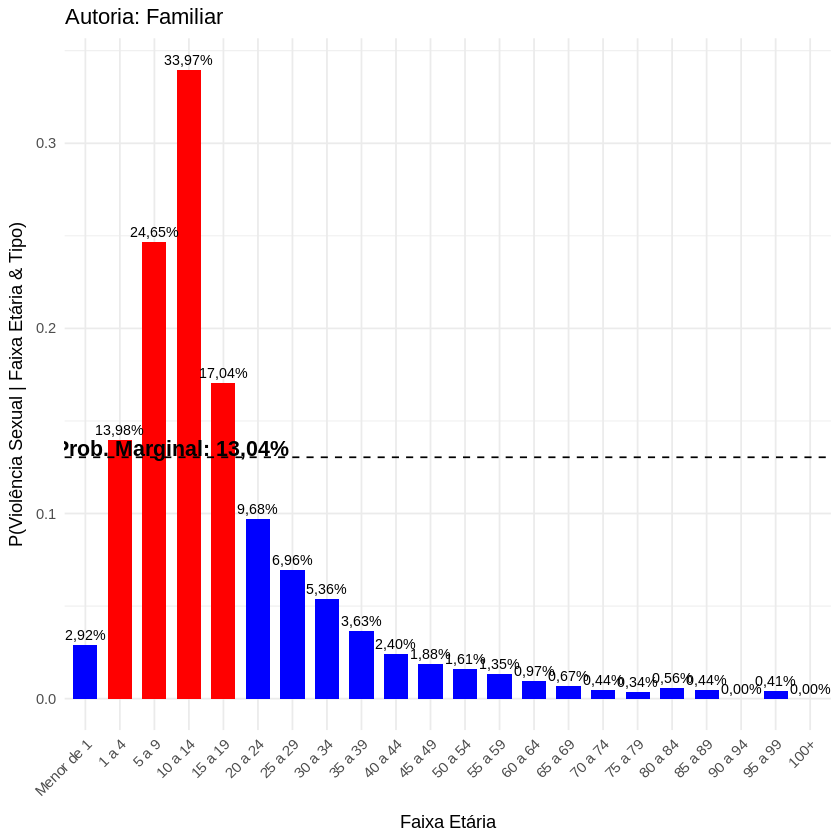

In [106]:
grafico2_faixa

In [93]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (faixas_etarias == "Menor de 1") & (Familiar== 1),
                n = 10e6)

[1] 0.02919626

In [94]:
set.seed(123)
cpquery(rede_mb_expandida_ajustada,
                event = (VIOL_SEXU == 1),
                evidence = (faixas_etarias == "Menor de 1") & (REL_DESCO== 1),
                n = 10e6)

[1] 0.2225086